In [ ]:
#Q2-Toyota Corolla

In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [ ]:
#Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/ToyotaCorolla.csv',encoding='latin1')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [ ]:
df=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [ ]:
df.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

In [ ]:
df.head(10)

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986   90  2000      3      5            210    1165
1  13750         23  72937   90  2000      3      5            210    1165
2  13950         24  41711   90  2000      3      5            210    1165
3  14950         26  48000   90  2000      3      5            210    1165
4  13750         30  38500   90  2000      3      5            210    1170
5  12950         32  61000   90  2000      3      5            210    1170
6  16900         27  94612   90  2000      3      5            210    1245
7  18600         30  75889   90  2000      3      5            210    1245
8  21500         27  19700  192  1800      3      5            100    1185
9  12950         23  71138   69  1900      3      5            185    1105

In [ ]:
df.tail(10)

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
1426   9950         78  30964  110  1600      3      4             85    1080
1427   8950         71  29000   86  1300      3      5             69    1045
1428   8450         72  26000   86  1300      3      5             69    1015
1429   8950         78  24000   86  1300      5      5             85    1065
1430   8450         80  23000   86  1300      3      5             69    1015
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

In [ ]:
df= df.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1431   7500   69  20544   86  1300      3      5   69    1025
1432  10845   72  19000   86  1300      3      5   69    1015
1433   8500   71  17016   86  1300      3      5   69    1015
1434   7250   70  16916   86  1300      3      5   69    1015
1435   6950   76      1  110  1600      5      5   19    1114

[1436 rows x 9 columns]

In [ ]:
df[df.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [ ]:
df= df.drop_duplicates().reset_index(drop=True)
df

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
0     13500   23  46986   90  2000      3      5  210    1165
1     13750   23  72937   90  2000      3      5  210    1165
2     13950   24  41711   90  2000      3      5  210    1165
3     14950   26  48000   90  2000      3      5  210    1165
4     13750   30  38500   90  2000      3      5  210    1170
...     ...  ...    ...  ...   ...    ...    ...  ...     ...
1430   7500   69  20544   86  1300      3      5   69    1025
1431  10845   72  19000   86  1300      3      5   69    1015
1432   8500   71  17016   86  1300      3      5   69    1015
1433   7250   70  16916   86  1300      3      5   69    1015
1434   6950   76      1  110  1600      5      5   19    1114

[1435 rows x 9 columns]

In [ ]:
df.describe()

Price          Age             KM           HP            CC  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears           QT       Weight  
count  1435.000000  1435.000000  1435.000000  1435.000000  
mean      4.032753     5.026481    87.020209  1072.287108  
std       0.952667     0.188575    40.959588    52.251882  
min       2.000000     3.000000    19.000000  1000.000000  
25%       3.000000     5.000000    69.000000  1040.000000  
50%       4.000000     5.000000    85.000000  1070.000000  
75%       5.000000     5.000000    85.000000  1085.000000  
max       5.000000     6.000000   283.000000  1615.000000

In [ ]:
#Correlation analysis
df.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              QT    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QT      1.000000  0.621988  
Weight  0.621988  1.000000

In [ ]:
df.skew()

Price      1.696579
Age       -0.825567
KM         1.017023
HP         0.957833
CC        27.452196
Doors     -0.075056
Gears      2.282921
QT         1.995336
Weight     3.116518
dtype: float64

In [ ]:
df.kurt()

Price       3.729769
Age        -0.076573
KM          1.688525
HP          8.845659
CC        931.434173
Doors      -1.874887
Gears      37.675443
QT          4.329036
Weight     19.741527
dtype: float64

In [ ]:
df.mean()

Price     10720.915679
Age          55.980488
KM        68571.782578
HP          101.491986
CC         1576.560976
Doors         4.032753
Gears         5.026481
QT           87.020209
Weight     1072.287108
dtype: float64

In [ ]:
df.min()

Price     4350
Age          1
KM           1
HP          69
CC        1300
Doors        2
Gears        3
QT          19
Weight    1000
dtype: int64

In [ ]:
df.median()

Price      9900.0
Age          61.0
KM        63451.0
HP          110.0
CC         1600.0
Doors         4.0
Gears         5.0
QT           85.0
Weight     1070.0
dtype: float64

In [ ]:
df.mode()

Price  Age     KM   HP    CC  Doors  Gears  QT  Weight
0   8950   68  36000  110  1600      5      5  85    1075

In [ ]:
df.max()

Price      32500
Age           80
KM        243000
HP           192
CC         16000
Doors          5
Gears          6
QT           283
Weight      1615
dtype: int64

In [ ]:
df.var()

Price     1.302295e+07
Age       3.445966e+02
KM        1.405582e+09
HP        2.244426e+02
CC        1.801048e+05
Doors     9.075737e-01
Gears     3.556048e-02
QT        1.677688e+03
Weight    2.730259e+03
dtype: float64

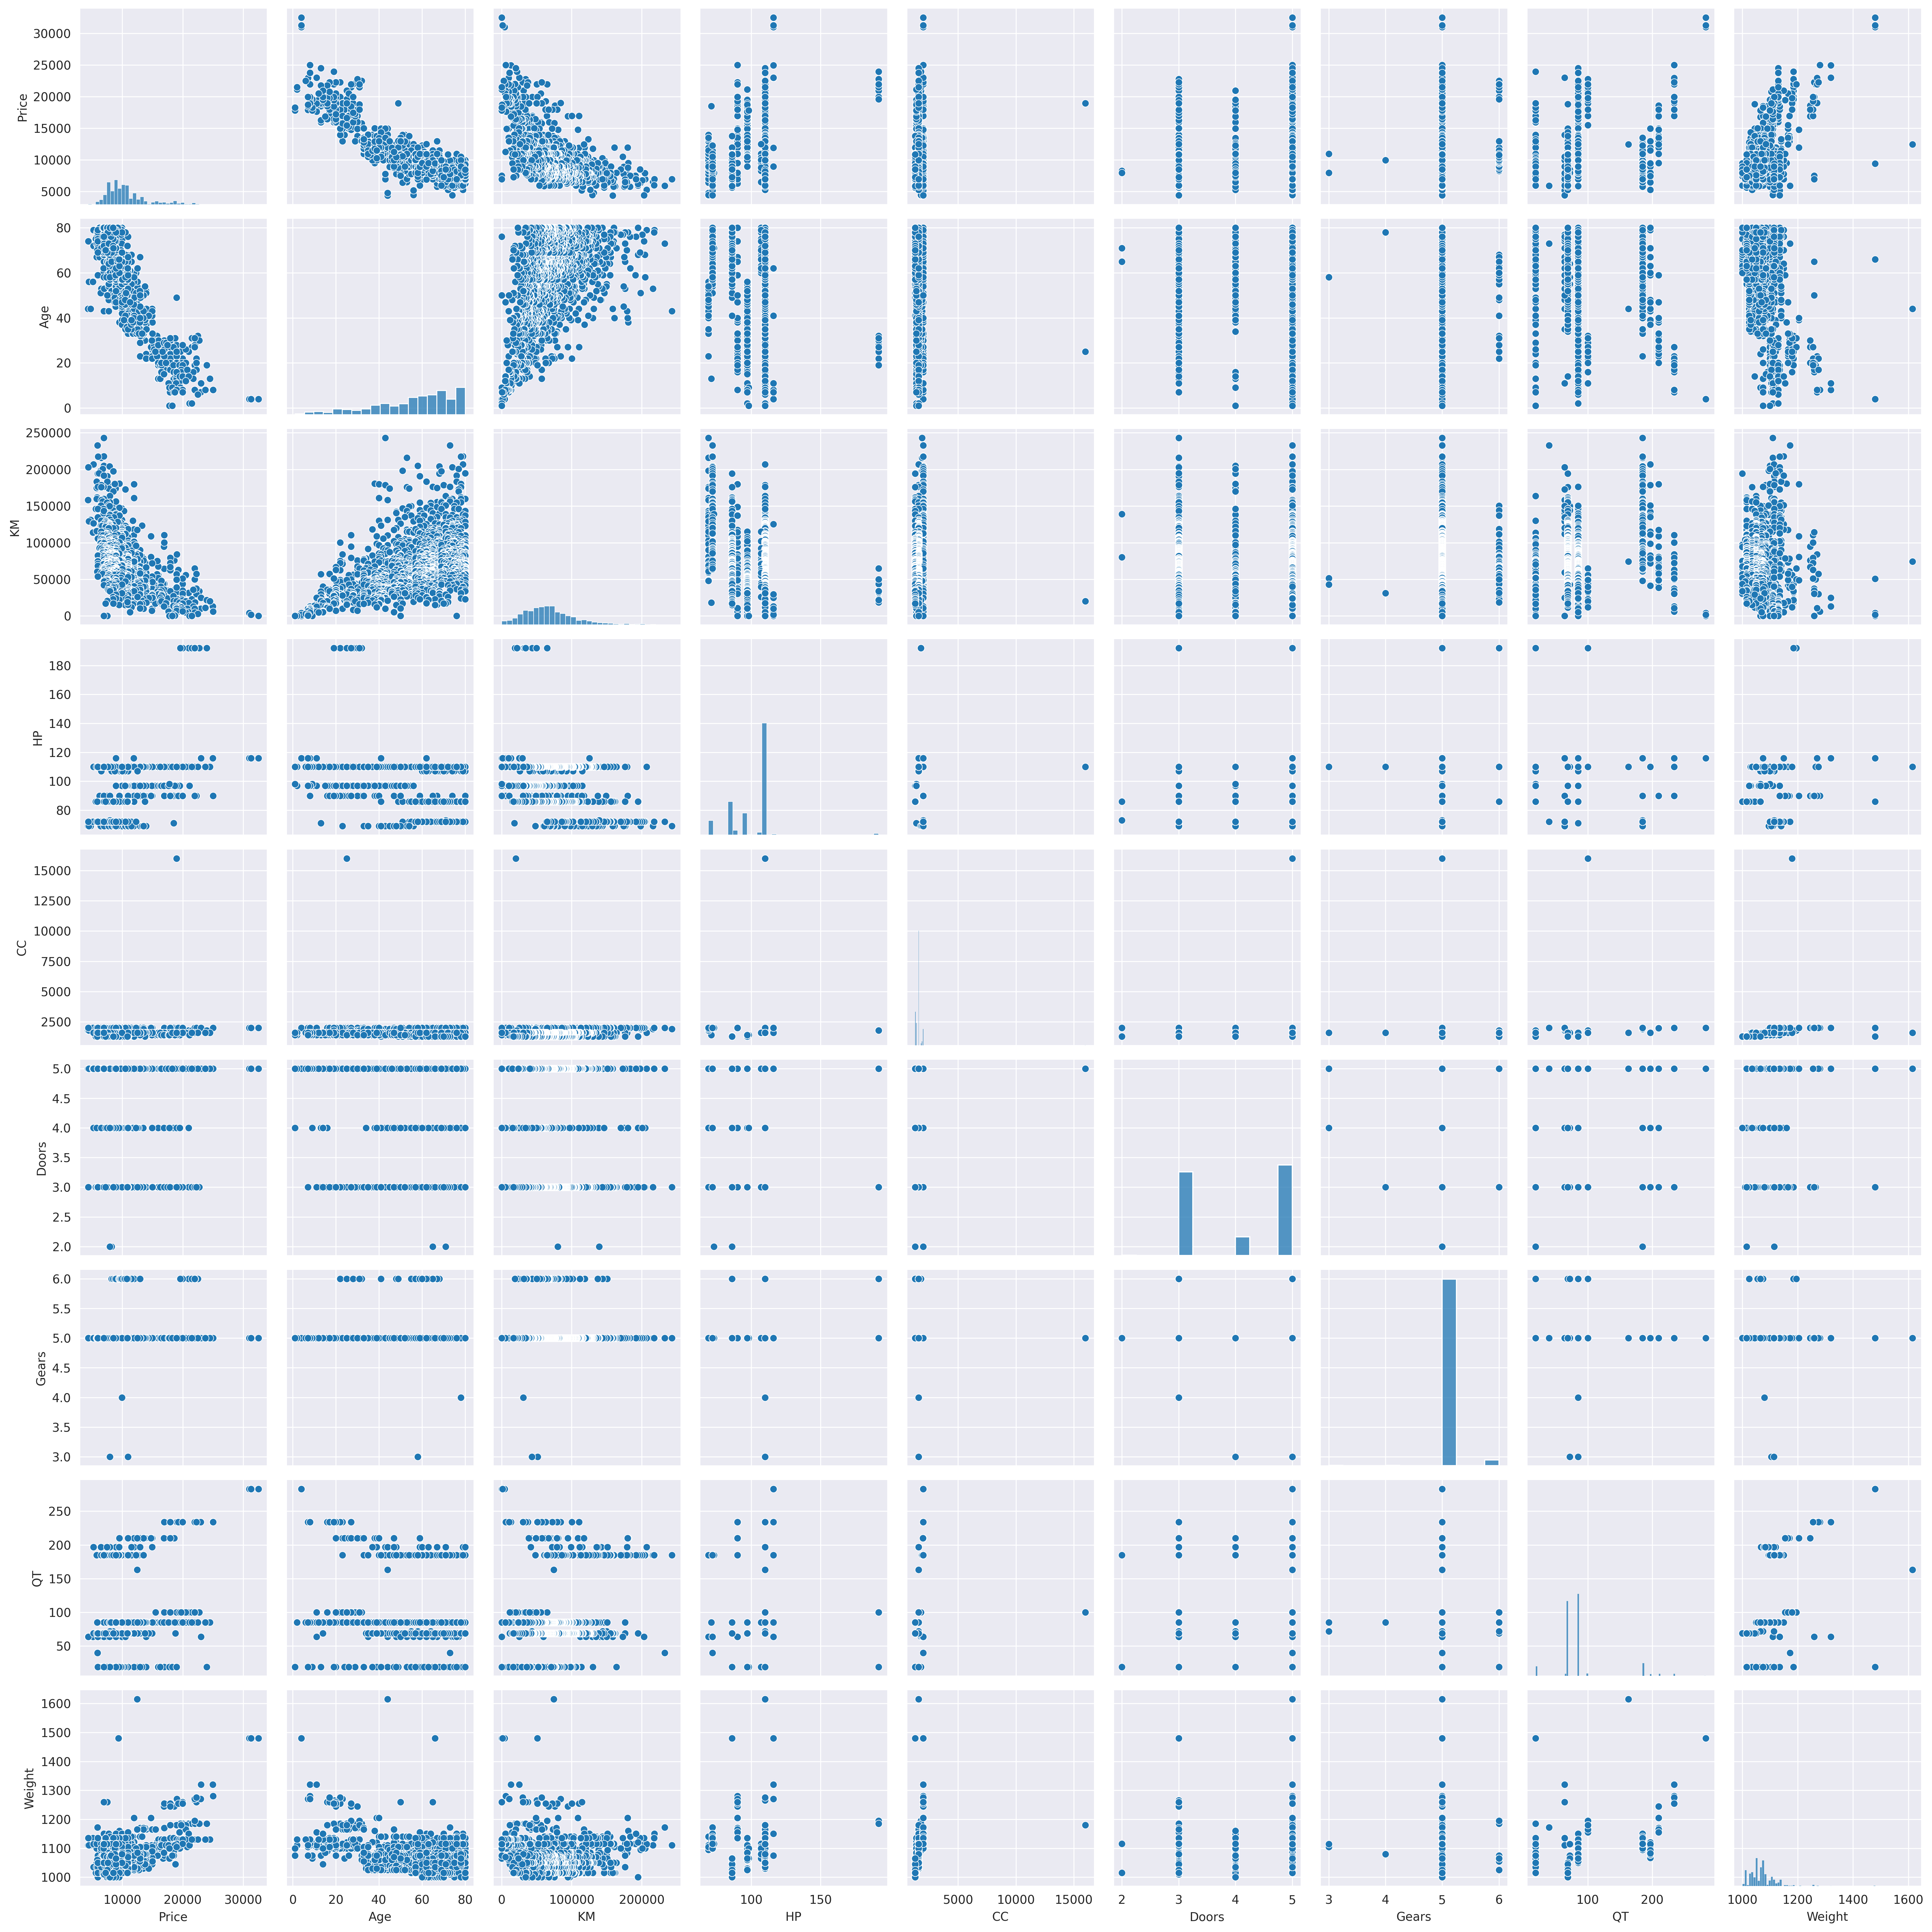

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.tight_layout()
plt.show()

<Axes: >

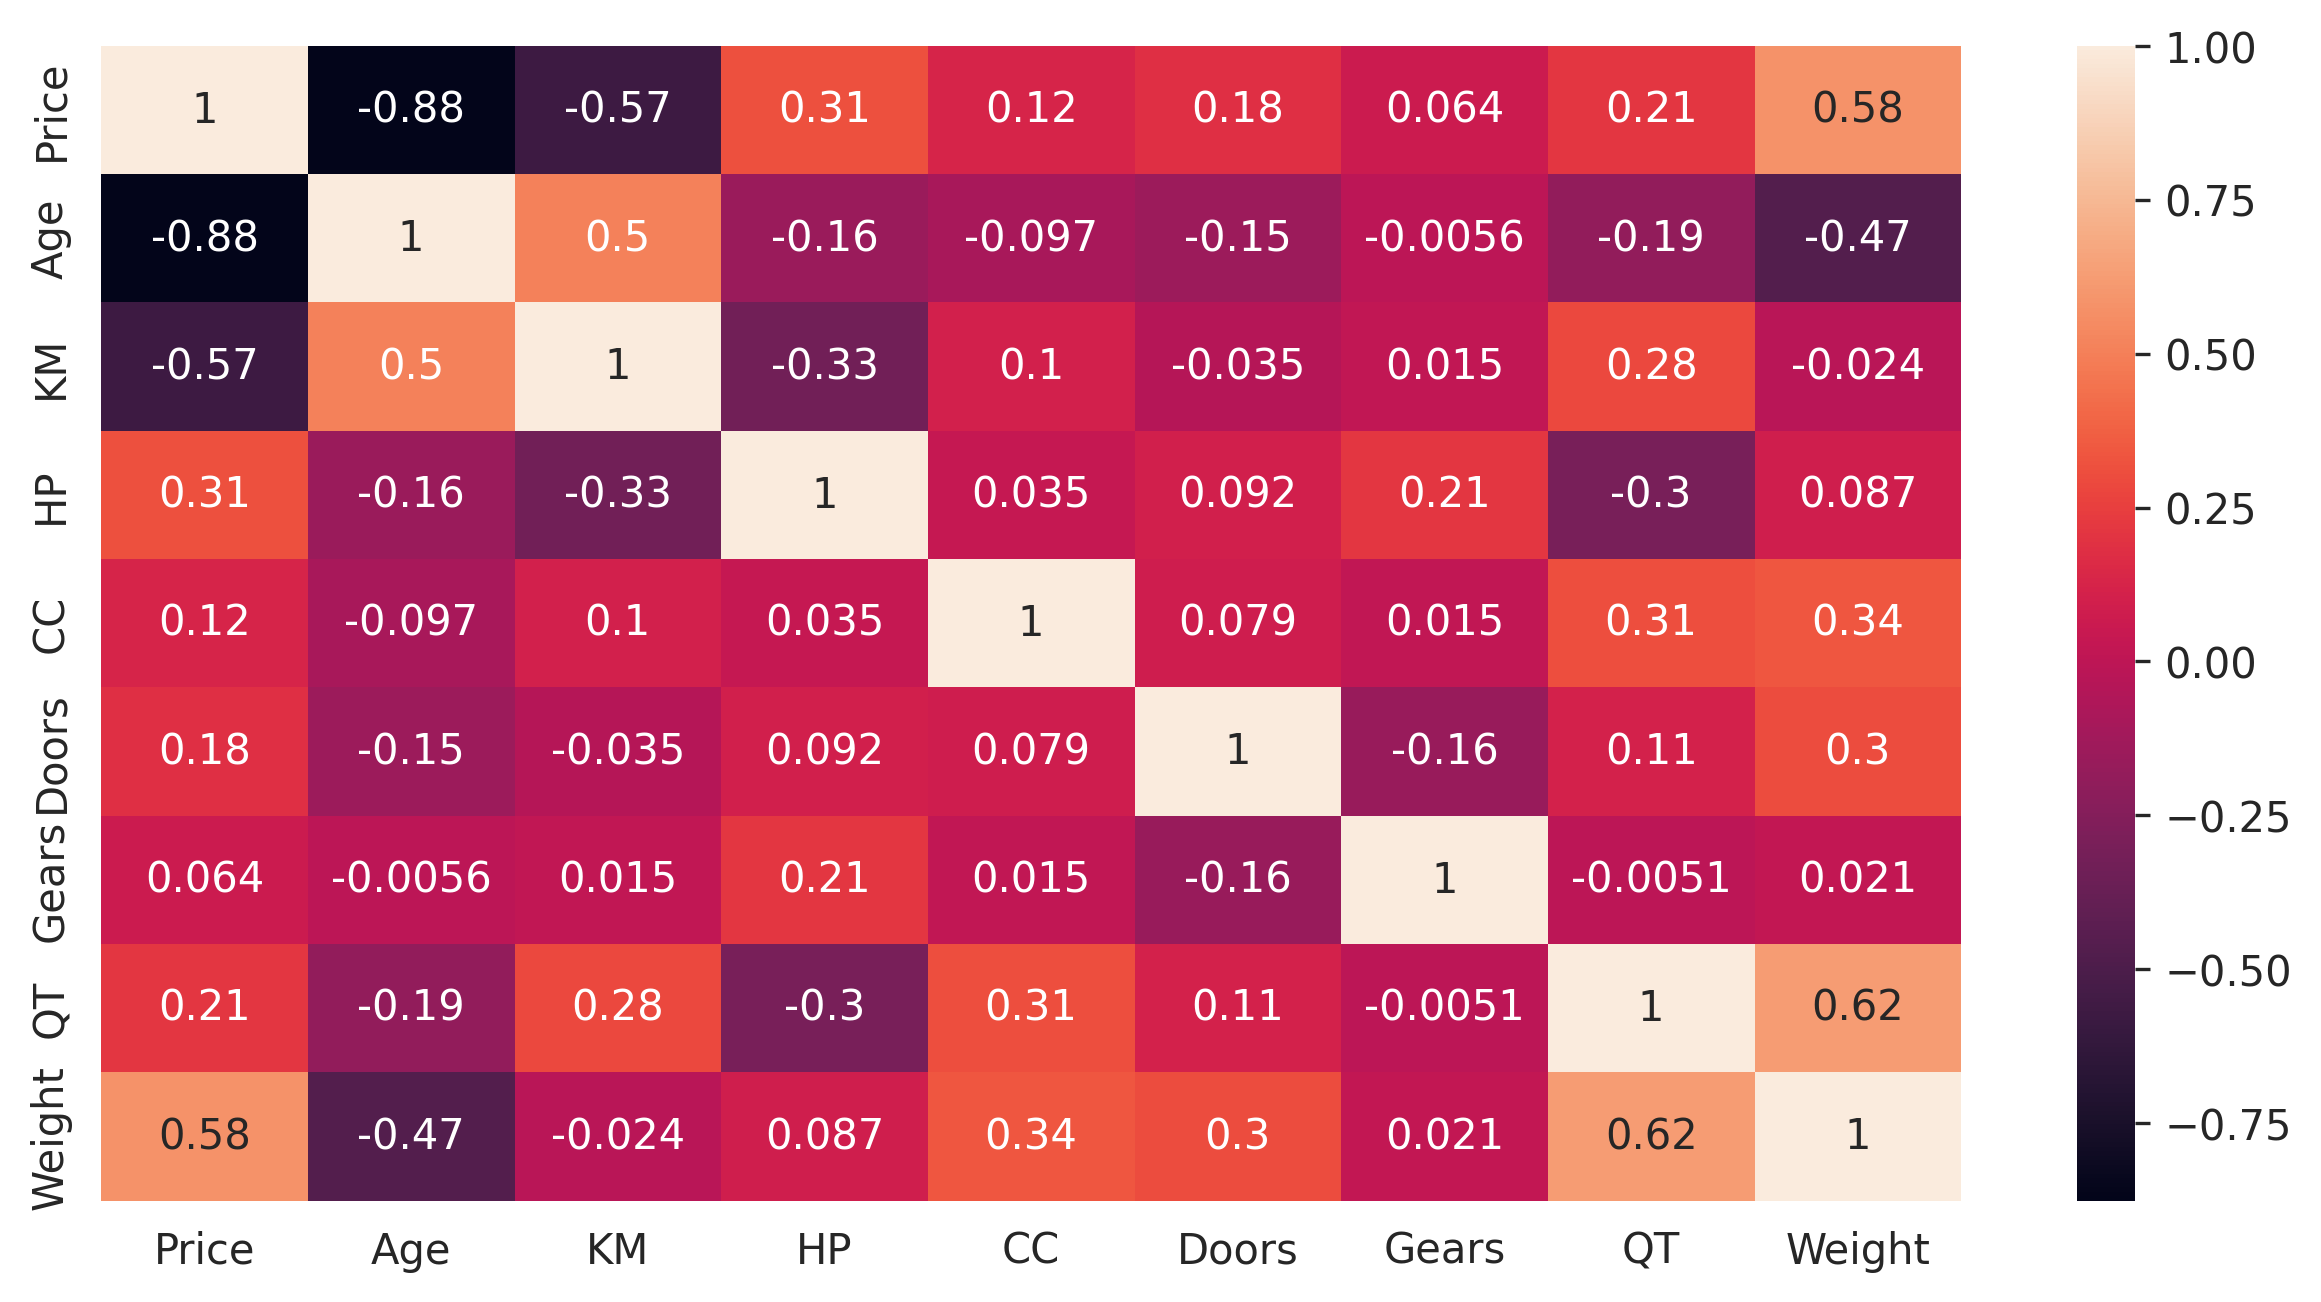

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Model Building

In [ ]:
#Import Statsmodels

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=df).fit()

In [ ]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
df.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [ ]:
#Print values for pvalues and tvalues
model.pvalues, model.tvalues

(Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64,
 Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64)

In [ ]:
#R2 values
model.rsquared, model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [ ]:
#Subset selection
model.aic

24750.407207346932

In [ ]:
#Price
Price = smf.ols('Age~Price+KM+HP+CC+Doors+Gears+QT',data=df).fit()
Price.pvalues, Price.tvalues

(Intercept    1.806341e-29
 Price        0.000000e+00
 KM           4.237321e-01
 HP           2.150144e-23
 CC           8.628431e-01
 Doors        4.532586e-01
 Gears        6.017263e-02
 QT           6.865989e-03
 dtype: float64,
 Intercept    11.529614
 Price       -51.483443
 KM            0.800193
 HP           10.143630
 CC           -0.172787
 Doors         0.750199
 Gears         1.881020
 QT            2.707215
 dtype: float64)

In [ ]:
Price.rsquared, Price.rsquared_adj

(0.7866311933093356, 0.7855845348322266)

In [ ]:
Price.aic

10254.468350241033

In [ ]:
#Age
Age = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df).fit()
Age.pvalues, Age.tvalues

(Intercept     7.374885e-03
 Age          8.357918e-112
 HP            3.479860e-14
 CC            7.509302e-03
 Doors         2.702618e-01
 Gears         4.834227e-03
 QT            2.594384e-22
 Weight        1.338165e-01
 dtype: float64,
 Intercept    -2.683269
 Age          24.615758
 HP           -7.657370
 CC            2.677192
 Doors         1.102888
 Gears         2.822297
 QT            9.879985
 Weight        1.500074
 dtype: float64)

In [ ]:
Age.rsquared, Age.rsquared_adj

(0.43090569859597216, 0.428114065722932)

In [ ]:
Age.aic

33504.86512860714

In [ ]:
#KM
KM = smf.ols('HP~KM+CC+Doors+Gears+QT+Weight+Price',data=df).fit()
KM.pvalues, KM.tvalues

(Intercept    6.392094e-04
 KM           2.056485e-02
 CC           2.380785e-04
 Doors        8.282984e-03
 Gears        2.973176e-18
 QT           2.001529e-53
 Weight       8.132188e-09
 Price        4.110157e-09
 dtype: float64,
 Intercept    -3.421994
 KM           -2.318464
 CC            3.684113
 Doors         2.644004
 Gears         8.831210
 QT          -16.050840
 Weight        5.800464
 Price         5.916536
 dtype: float64)

In [ ]:
KM.rsquared, KM.rsquared_adj

(0.311176224205708, 0.3077972708556308)

In [ ]:
KM.aic

11320.973122993108

In [ ]:
#HP
HP = smf.ols('CC~HP+Doors+Gears+QT+Weight+Price+Age',data=df).fit()
HP.pvalues, HP.tvalues

(Intercept    2.289778e-02
 HP           2.746855e-04
 Doors        5.729454e-01
 Gears        7.859821e-01
 QT           5.857790e-08
 Weight       3.694413e-11
 Price        2.252255e-02
 Age          4.657322e-01
 dtype: float64,
 Intercept   -2.277600
 HP           3.647167
 Doors       -0.563849
 Gears       -0.271583
 QT           5.452114
 Weight       6.668082
 Price       -2.283921
 Age         -0.729636
 dtype: float64)

In [ ]:
HP.rsquared, HP.rsquared_adj

(0.1393315199030557, 0.13510960023895002)

In [ ]:
HP.aic

21237.394366169192

In [ ]:
#CC
CC = smf.ols('Doors~CC+Gears+QT+Weight+Price+Age+KM',data=df).fit()
CC.pvalues, CC.tvalues

(Intercept    3.131681e-01
 CC           7.179451e-01
 Gears        8.149739e-12
 QT           3.674105e-05
 Weight       1.146892e-20
 Price        4.573338e-01
 Age          5.749331e-01
 KM           3.960532e-01
 dtype: float64,
 Intercept    1.008953
 CC          -0.361278
 Gears       -6.893461
 QT          -4.140147
 Weight       9.466932
 Price        0.743446
 Age          0.560930
 KM           0.848947
 dtype: float64)

In [ ]:
CC.rsquared, CC.rsquared_adj

(0.13081464009494348, 0.12655094176324377)

In [ ]:
CC.aic

3747.000769715697

In [ ]:
#Doors
Doors = smf.ols('Gears~Doors+QT+Weight+Price+Age+KM+HP',data=df).fit()
Doors.pvalues, Doors.tvalues

(Intercept    5.714290e-184
 Doors         5.519702e-13
 QT            1.662530e-01
 Weight        3.461695e-01
 Price         2.300163e-03
 Age           4.999159e-02
 KM            1.602500e-04
 HP            2.224357e-15
 dtype: float64,
 Intercept    33.739336
 Doors        -7.279359
 QT            1.385052
 Weight       -0.942357
 Price         3.053968
 Age           1.961700
 KM            3.784730
 HP            8.017690
 dtype: float64)

In [ ]:
Doors.rsquared, Doors.rsquared_adj

(0.09565570232255294, 0.09121953548040695)

In [ ]:
Doors.aic

-844.8357548910094

In [ ]:
#Gears
Gears = smf.ols('QT~Gears+Weight+Price+Age+KM+HP+CC',data=df).fit()
Gears.pvalues, Gears.tvalues

(Intercept    3.600712e-43
 Gears        4.496156e-02
 Weight       1.337802e-93
 Price        3.176180e-03
 Age          5.875563e-01
 KM           1.059444e-23
 HP           5.077661e-53
 CC           1.790685e-06
 dtype: float64,
 Intercept   -14.248569
 Gears         2.006779
 Weight       22.139321
 Price         2.955175
 Age           0.542504
 KM           10.217504
 HP          -15.982532
 CC            4.795708
 dtype: float64)

In [ ]:
Gears.rsquared, Gears.rsquared_adj

(0.5645696188416957, 0.5624336604197557)

In [ ]:
Gears.aic

13549.38665145219

In [ ]:
#QT
QT = smf.ols('Weight~QT+Price+Age+KM+HP+CC+Doors',data=df).fit()
QT.pvalues, QT.tvalues

(Intercept    0.000000e+00
 QT           2.530674e-94
 Price        1.297391e-51
 Age          5.053032e-04
 KM           1.069706e-12
 HP           3.909611e-06
 CC           8.675704e-10
 Doors        2.569195e-20
 dtype: float64,
 Intercept    72.230065
 QT           22.240051
 Price        15.743155
 Age           3.485925
 KM            7.186243
 HP            4.634234
 CC            6.173756
 Doors         9.376995
 dtype: float64)

In [ ]:
QT.rsquared, QT.rsquared_adj

(0.6574087902893193, 0.6557282447616566)

In [ ]:
QT.aic

13904.094224082946

In [ ]:
#Weight
Weight = smf.ols('Price~Weight+Age+KM+HP+CC+Doors+Gears',data=df).fit()
Weight.pvalues, Weight.tvalues

(Intercept     1.524874e-07
 Weight        6.157002e-89
 Age          2.829516e-290
 KM            6.982223e-55
 HP            1.603198e-26
 CC            3.364292e-01
 Doors         8.083501e-01
 Gears         1.611598e-03
 dtype: float64,
 Intercept    -5.275909
 Weight       21.484300
 Age         -46.770204
 KM          -16.295434
 HP           10.875433
 CC           -0.961569
 Doors        -0.242600
 Gears         3.159858
 dtype: float64)

In [ ]:
Weight.rsquared, Weight.rsquared_adj

(0.861684319120475, 0.8610058259416686)

In [ ]:
Weight.aic

24757.10380993599

In [ ]:
#Calculating vif Values
rsq_Price = smf.ols('Age~Price+KM+HP+CC+Doors+Gears+QT',data=df).fit().rsquared
vif_Price = 1/(1-rsq_Price)
rsq_Age = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=df).fit().rsquared
vif_Age = 1/(1-rsq_Age)
rsq_KM = smf.ols('HP~KM+CC+Doors+Gears+QT+Weight+Price',data=df).fit().rsquared
vif_KM = 1/(1-rsq_KM)
rsq_HP = smf.ols('CC~HP+Doors+Gears+QT+Weight+Price+Age',data=df).fit().rsquared
vif_HP = 1/(1-rsq_HP)
rsq_CC = smf.ols('Doors~CC+Gears+QT+Weight+Price+Age+KM',data=df).fit().rsquared
vif_CC = 1/(1-rsq_CC)
rsq_Doors = smf.ols('Gears~Doors+QT+Weight+Price+Age+KM+HP',data=df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)
rsq_Gears = smf.ols('QT~Gears+Weight+Price+Age+KM+HP+CC',data=df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)
rsq_QT = smf.ols('Weight~QT+Price+Age+KM+HP+CC+Doors',data=df).fit().rsquared
vif_QT = 1/(1-rsq_QT)
rsq_Weight = smf.ols('Price~Weight+Age+KM+HP+CC+Doors+Gears',data=df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)


In [ ]:
# Putting the values in Dataframe format
d={'Variables':['Price','Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_Price,vif_Age,vif_KM,vif_HP,vif_CC,vif_Doors,vif_Gears,vif_QT,vif_Weight]}
Vif_df=pd.DataFrame(d)
Vif_df

Variables       Vif
0     Price  4.686721
1       Age  1.757178
2        KM  1.451750
3        HP  1.161888
4        CC  1.150503
5     Doors  1.105774
6     Gears  2.296578
7        QT  2.918931
8    Weight  7.229838

In [ ]:
#Model validation Techniques
#Statsmodel
import statsmodels.api as sm

In [ ]:
Price.resid

0      -19.589236
1      -18.575891
2      -16.407273
3       -9.682478
4      -11.338783
          ...    
1430     1.409936
1431    20.369849
1432     8.202324
1433     1.242892
1434     2.171430
Length: 1435, dtype: float64

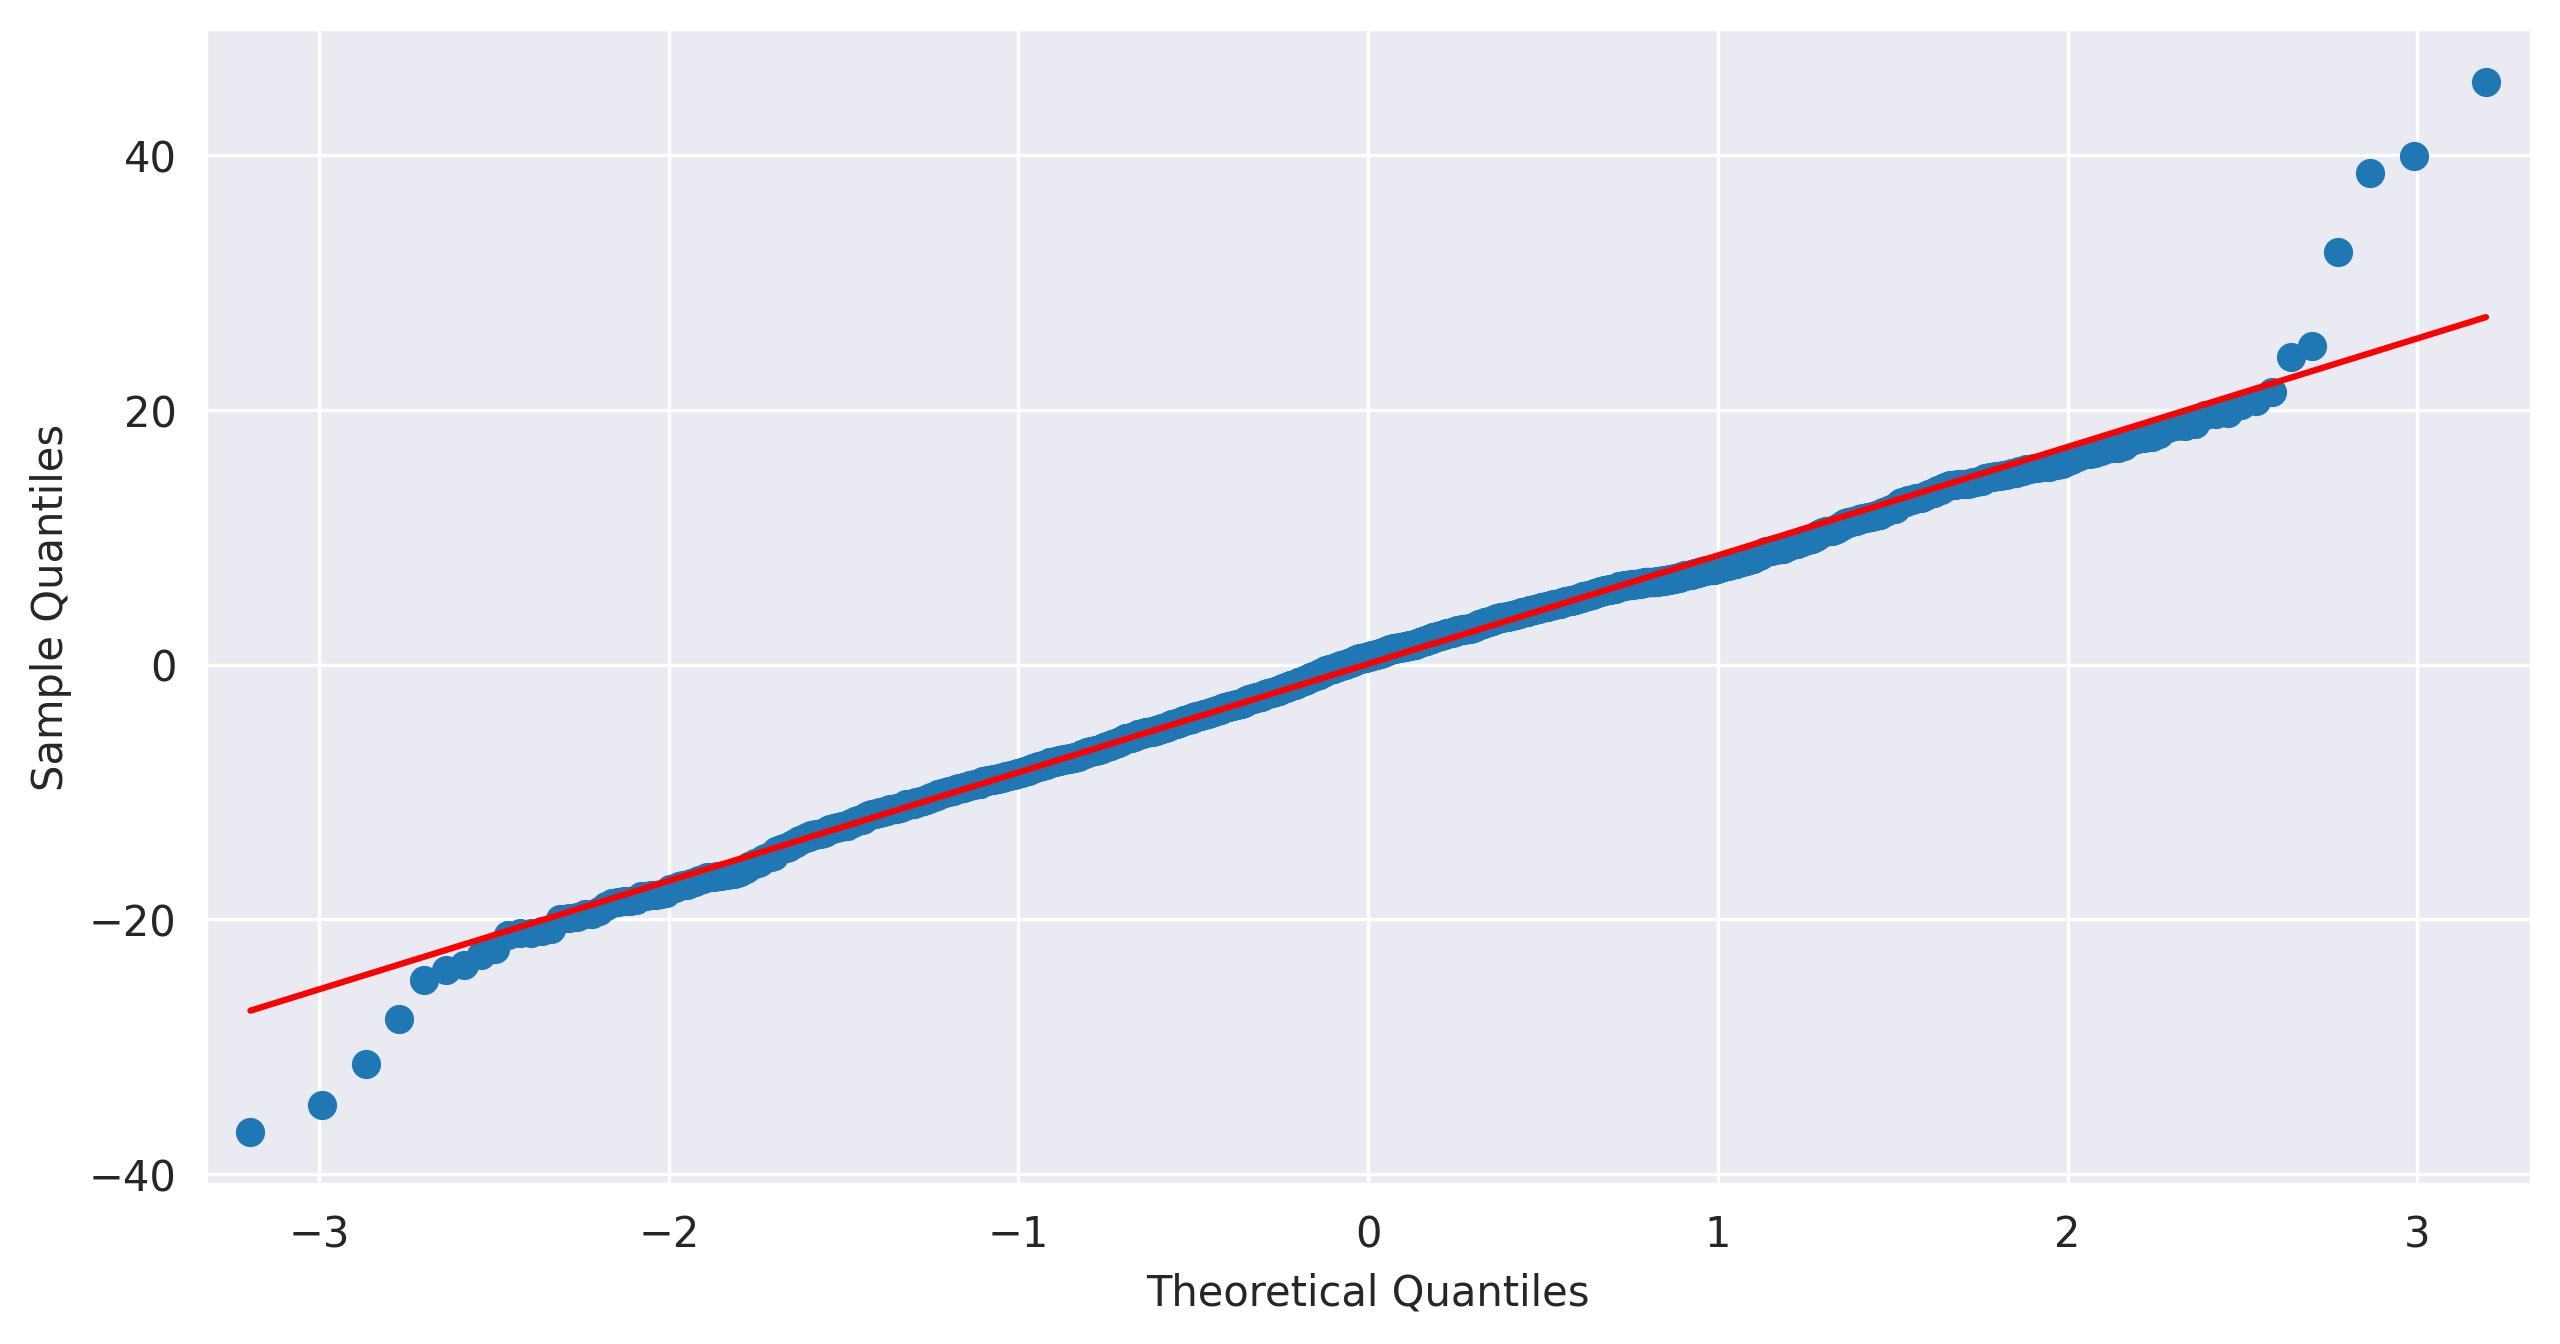

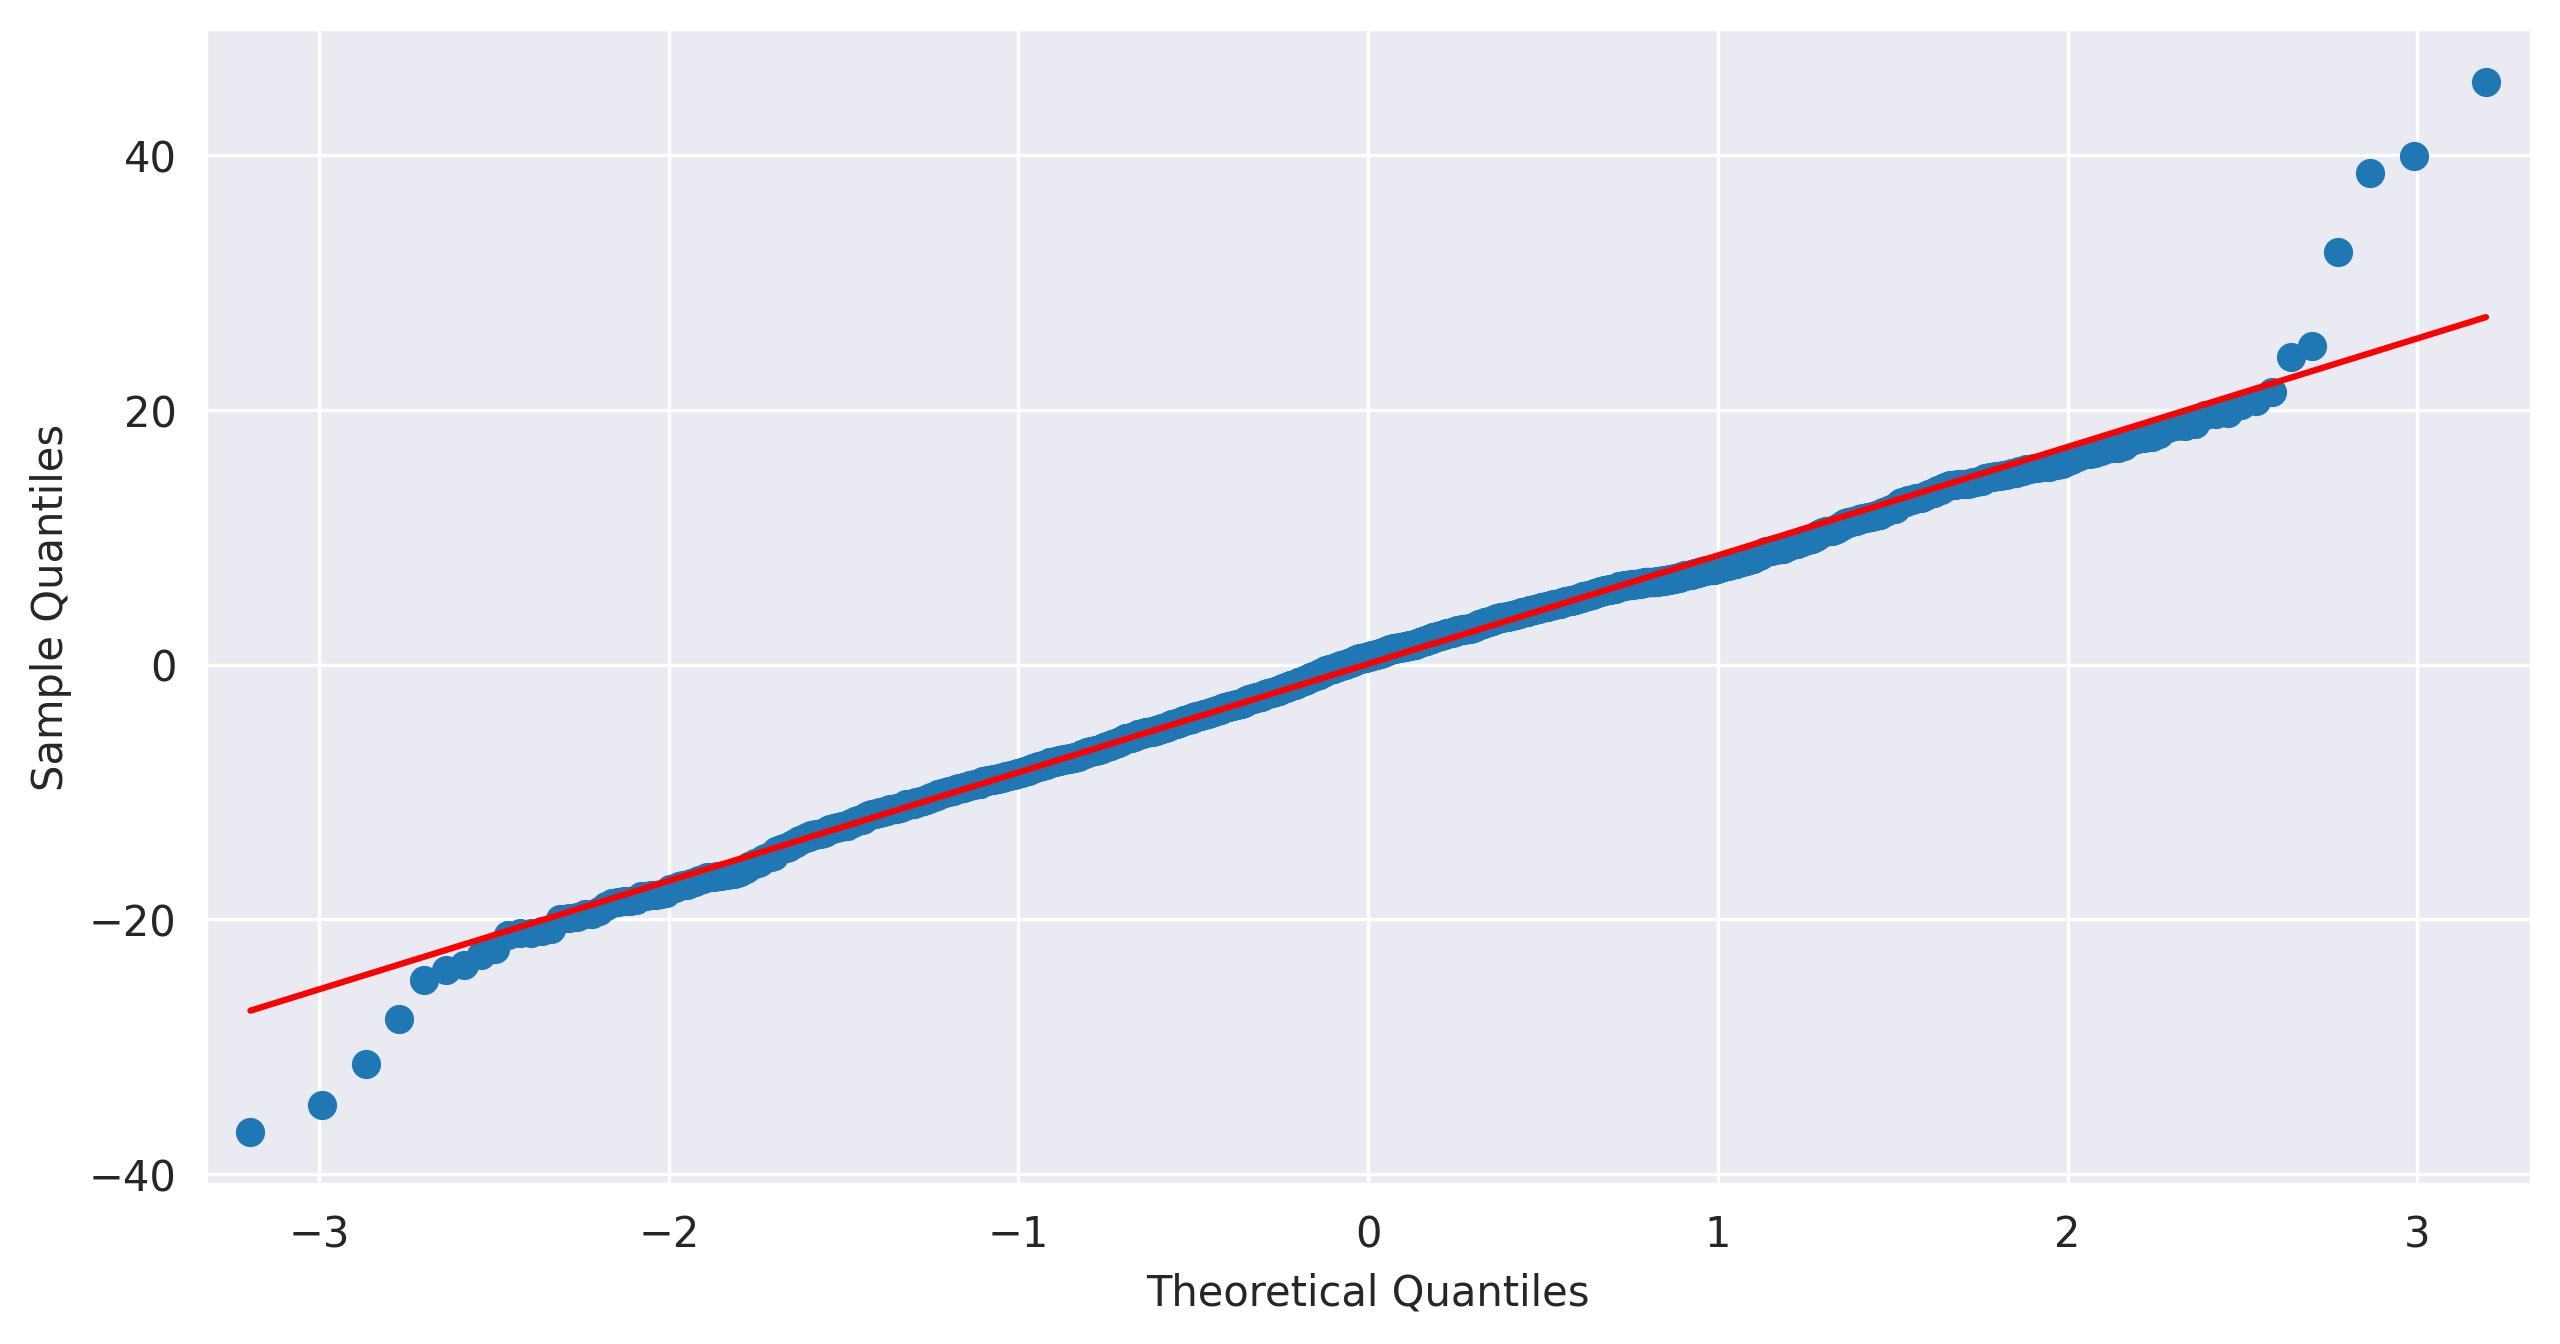

In [ ]:
#Q-Q Plots
sm.qqplot(Price.resid,line='q')

In [ ]:
#Get index for higher residuals
np.where(Price.resid> 10)

(array([   7,   14,   16,   52,   62,   68,   74,   76,   89,   91,  109,
         110,  111,  112,  114,  118,  124,  137,  140,  146,  170,  522,
         528,  556,  655,  695,  709,  772,  795,  822,  835,  839,  846,
         890,  912,  945,  970,  987, 1027, 1034, 1041, 1053, 1057, 1058,
        1072, 1078, 1080, 1081, 1084, 1089, 1103, 1108, 1117, 1122, 1130,
        1141, 1143, 1149, 1151, 1158, 1161, 1162, 1174, 1175, 1178, 1181,
        1182, 1183, 1188, 1190, 1194, 1195, 1196, 1210, 1213, 1214, 1216,
        1229, 1239, 1249, 1255, 1257, 1260, 1262, 1264, 1273, 1276, 1279,
        1291, 1298, 1302, 1304, 1306, 1308, 1309, 1310, 1311, 1316, 1319,
        1321, 1322, 1326, 1328, 1329, 1332, 1334, 1335, 1338, 1339, 1342,
        1347, 1352, 1353, 1358, 1359, 1365, 1366, 1368, 1369, 1370, 1374,
        1377, 1379, 1380, 1382, 1383, 1384, 1391, 1394, 1395, 1398, 1401,
        1407, 1409, 1415, 1416, 1420, 1422, 1424, 1425, 1426, 1428, 1429,
        1431]),)

eval_env: 1


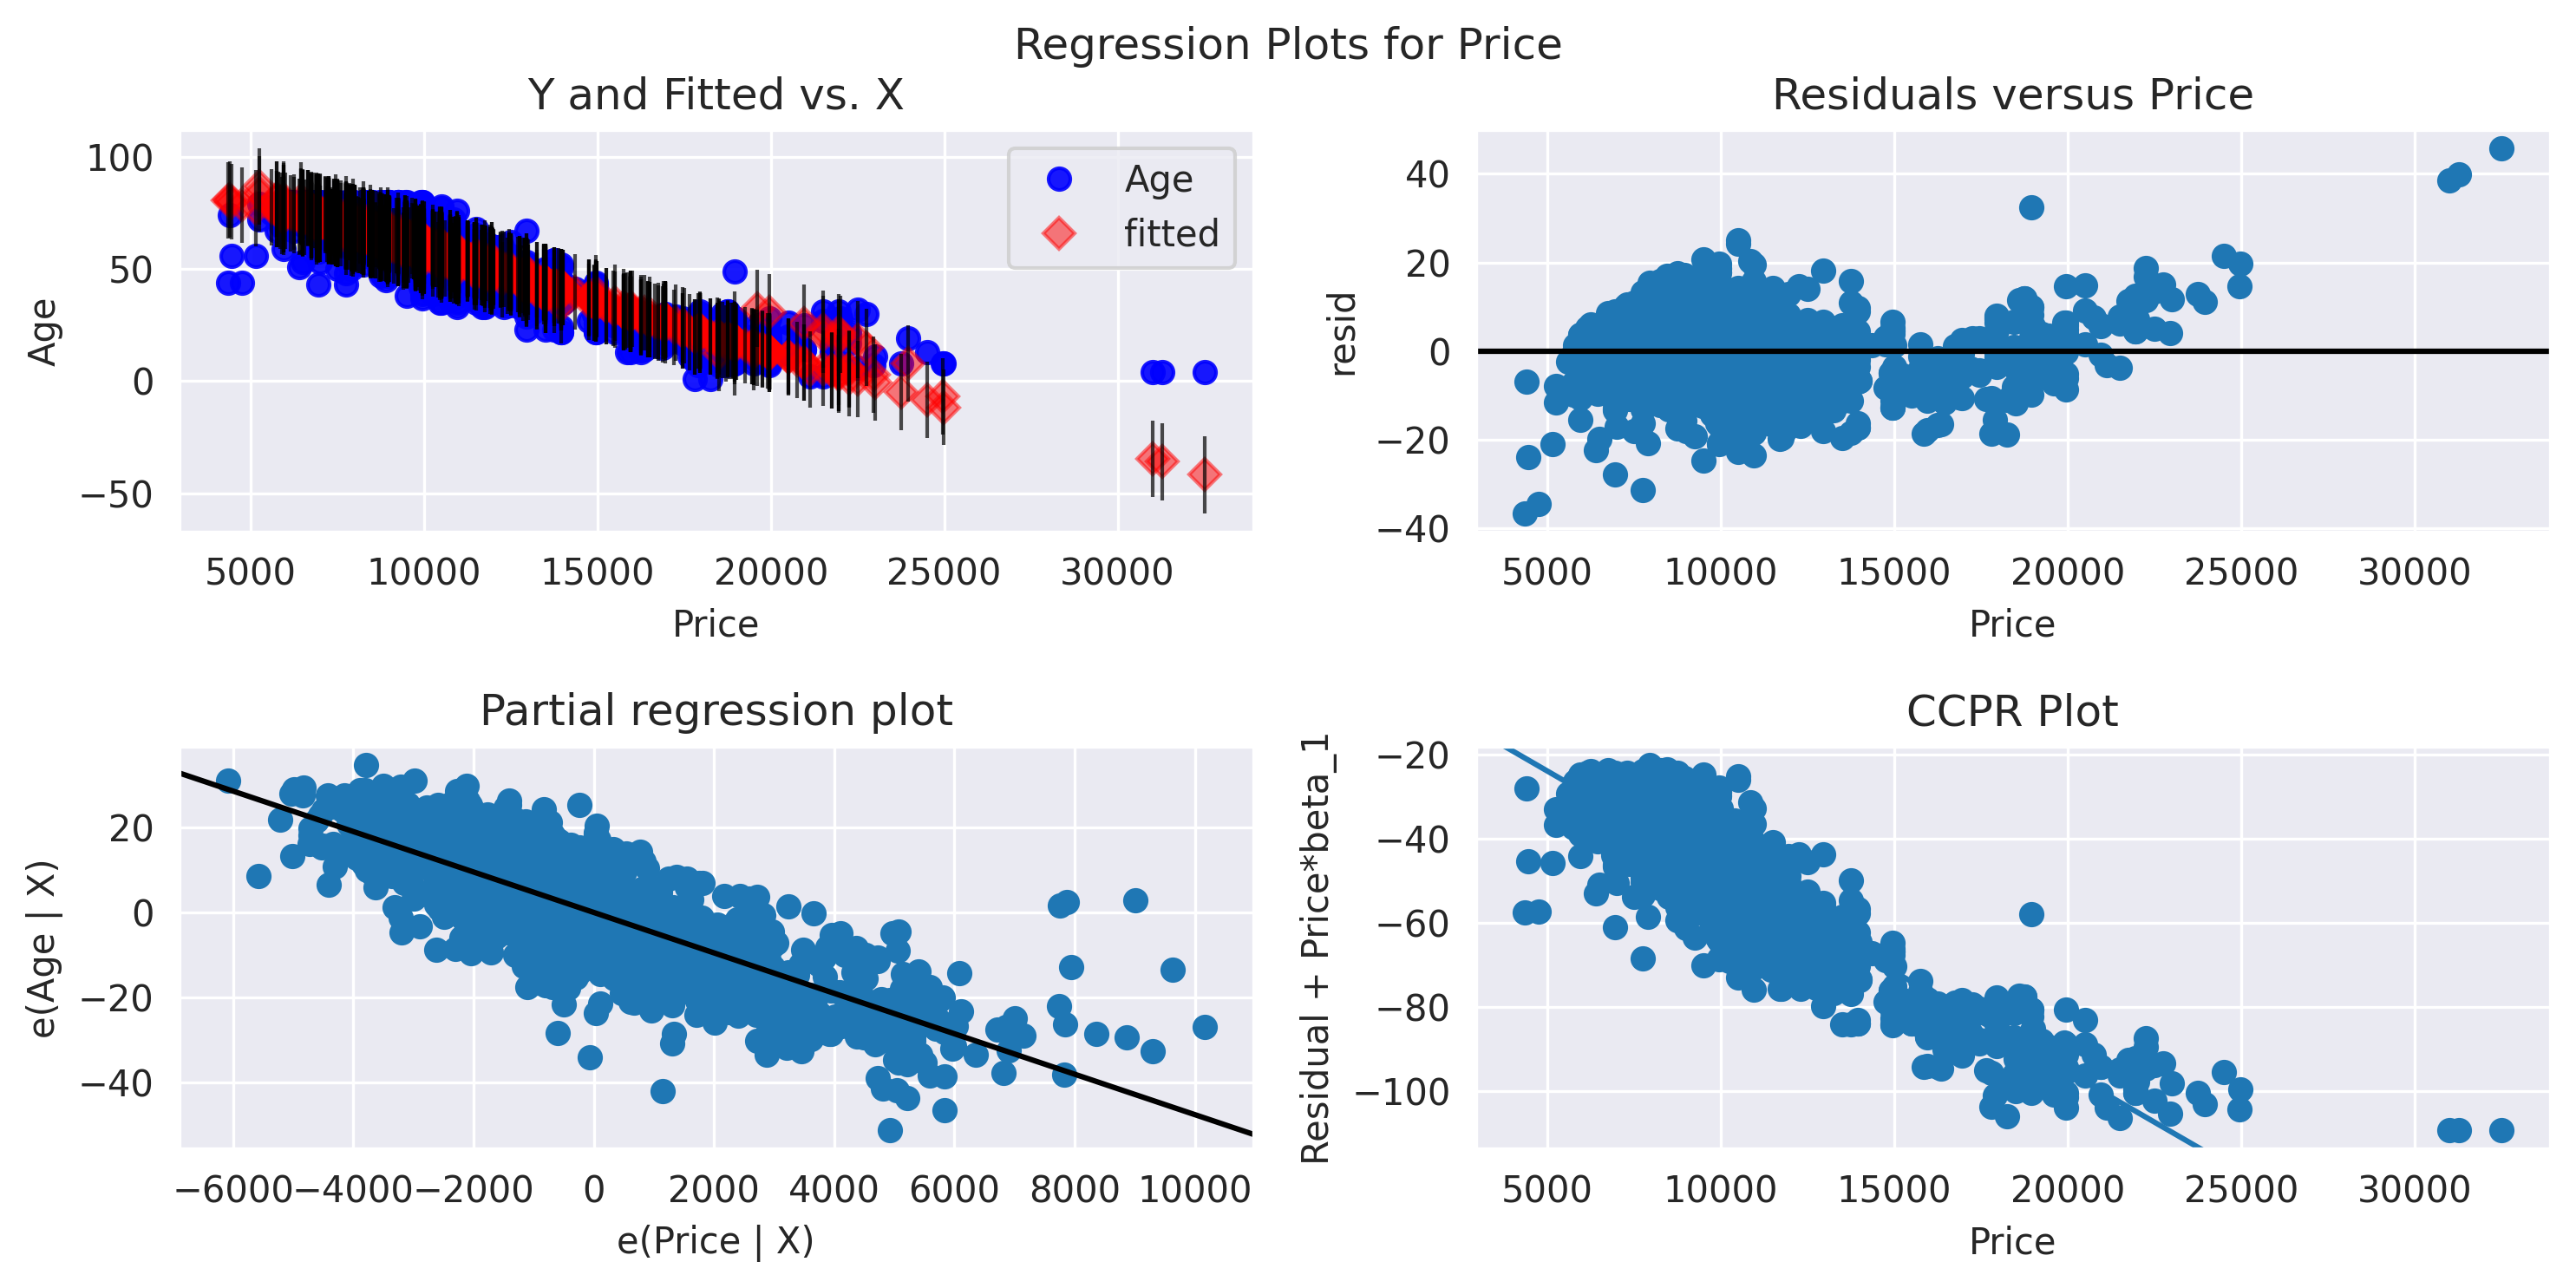

In [ ]:
#Residual vs Regressor
#rds
sm.graphics.plot_regress_exog(Price,'Price');

eval_env: 1


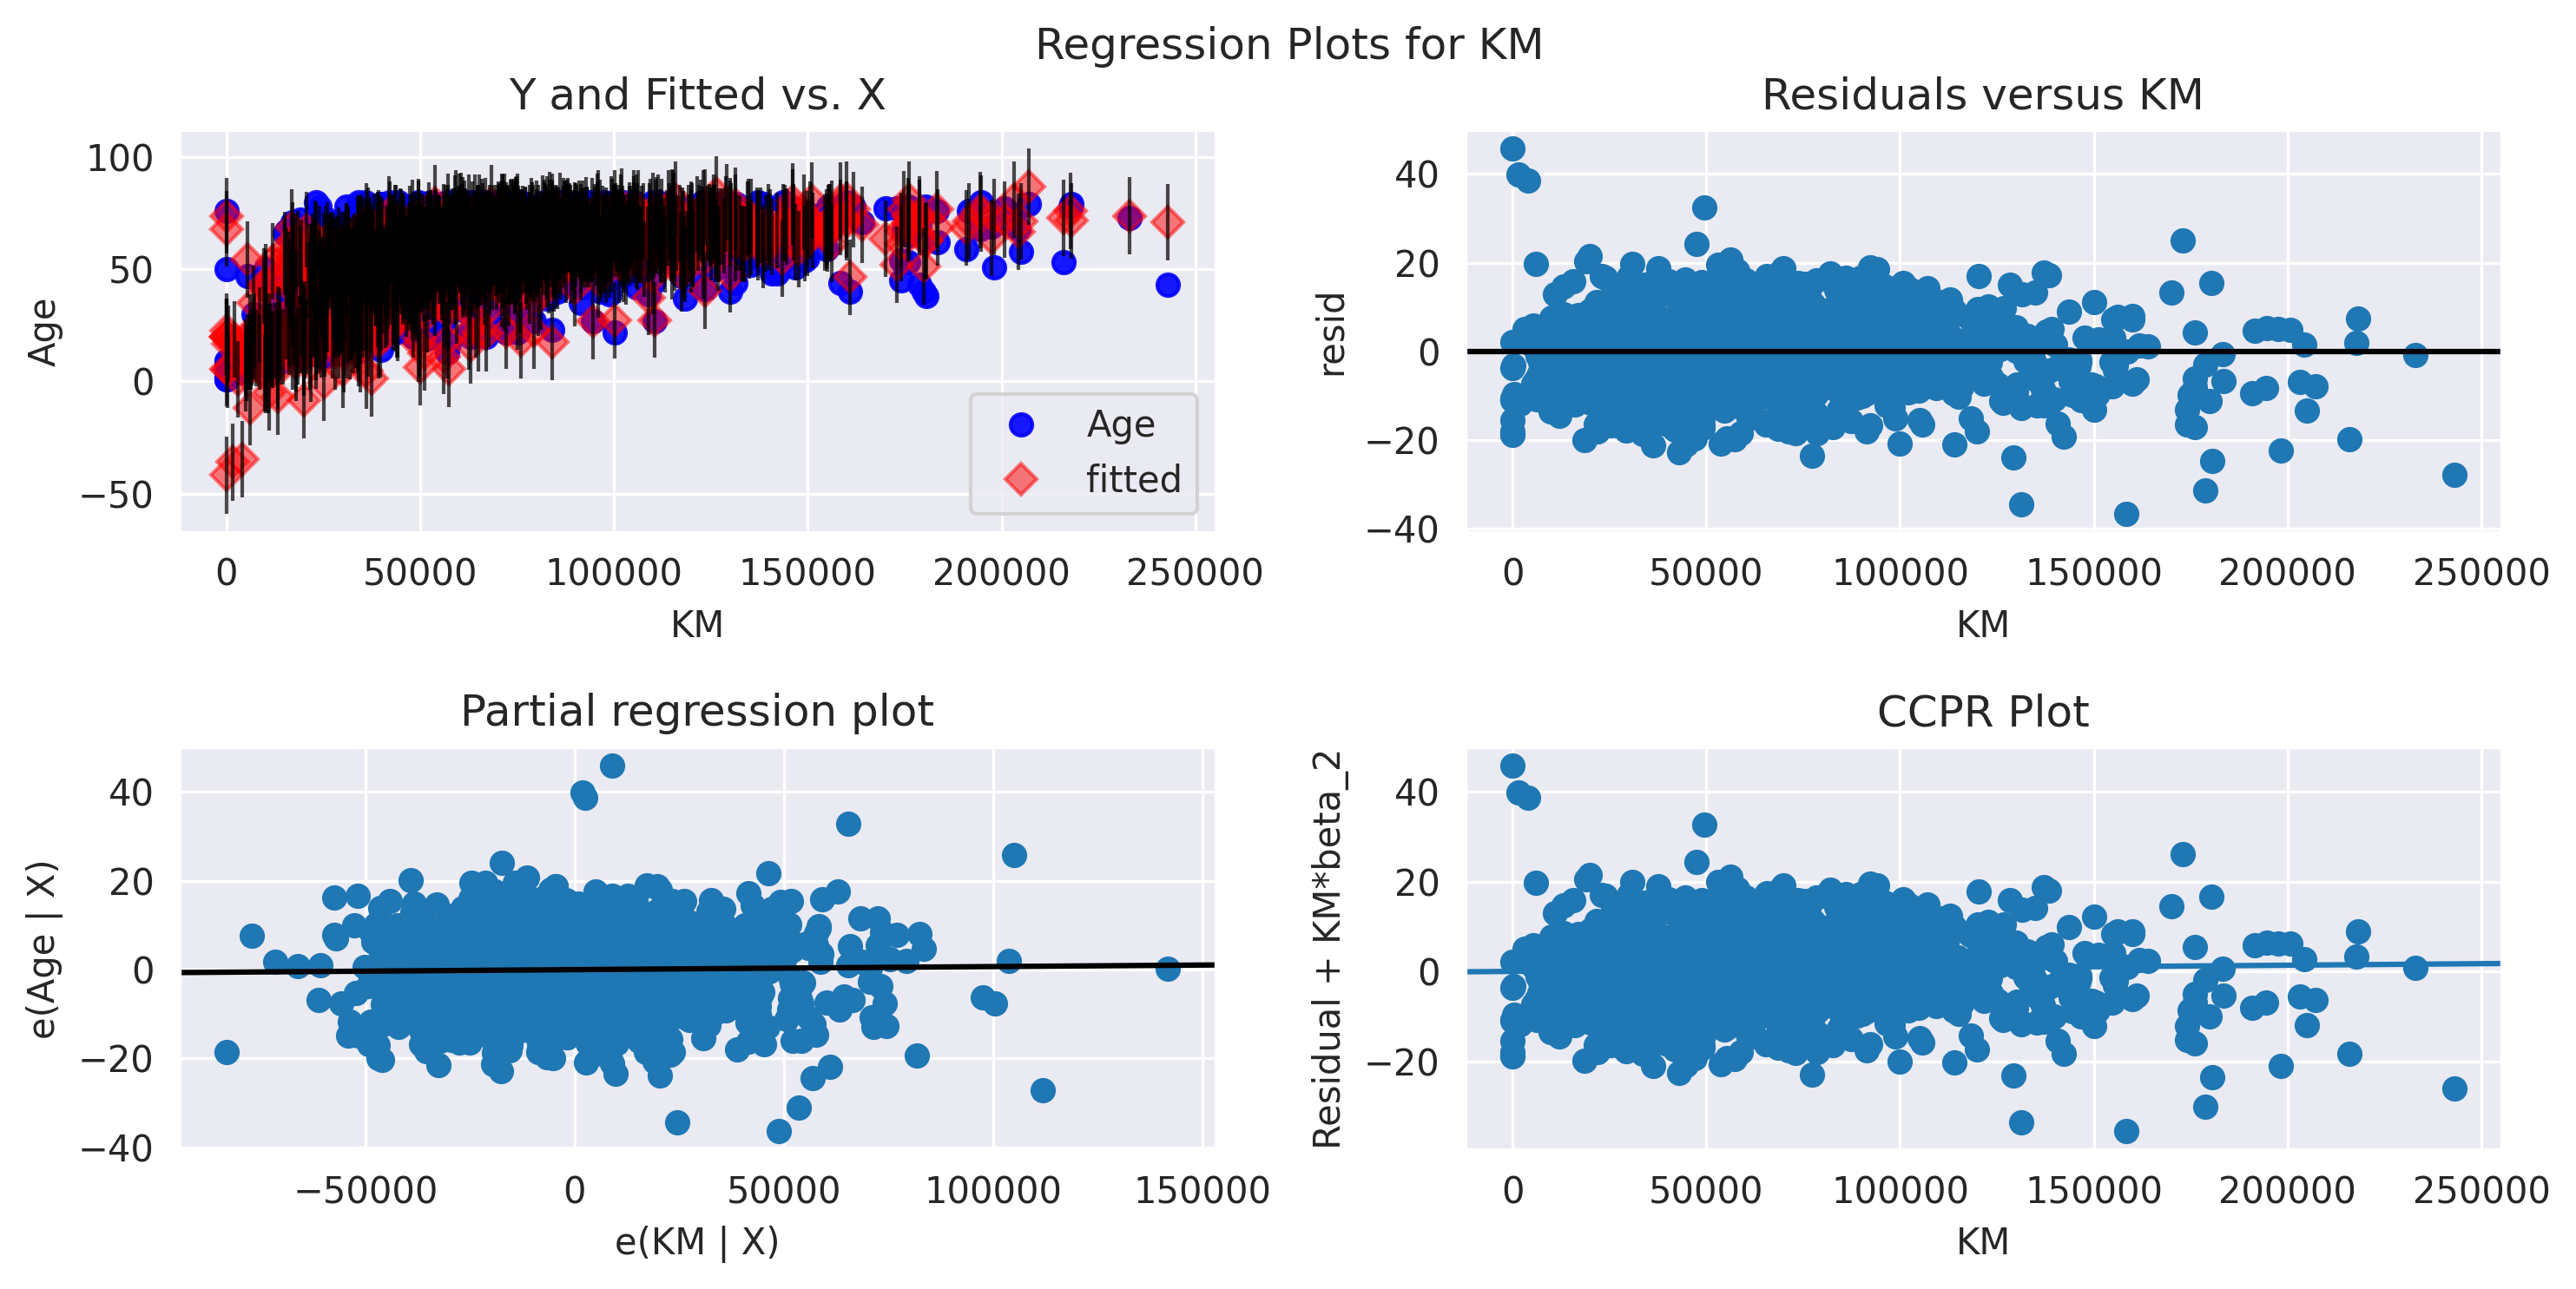

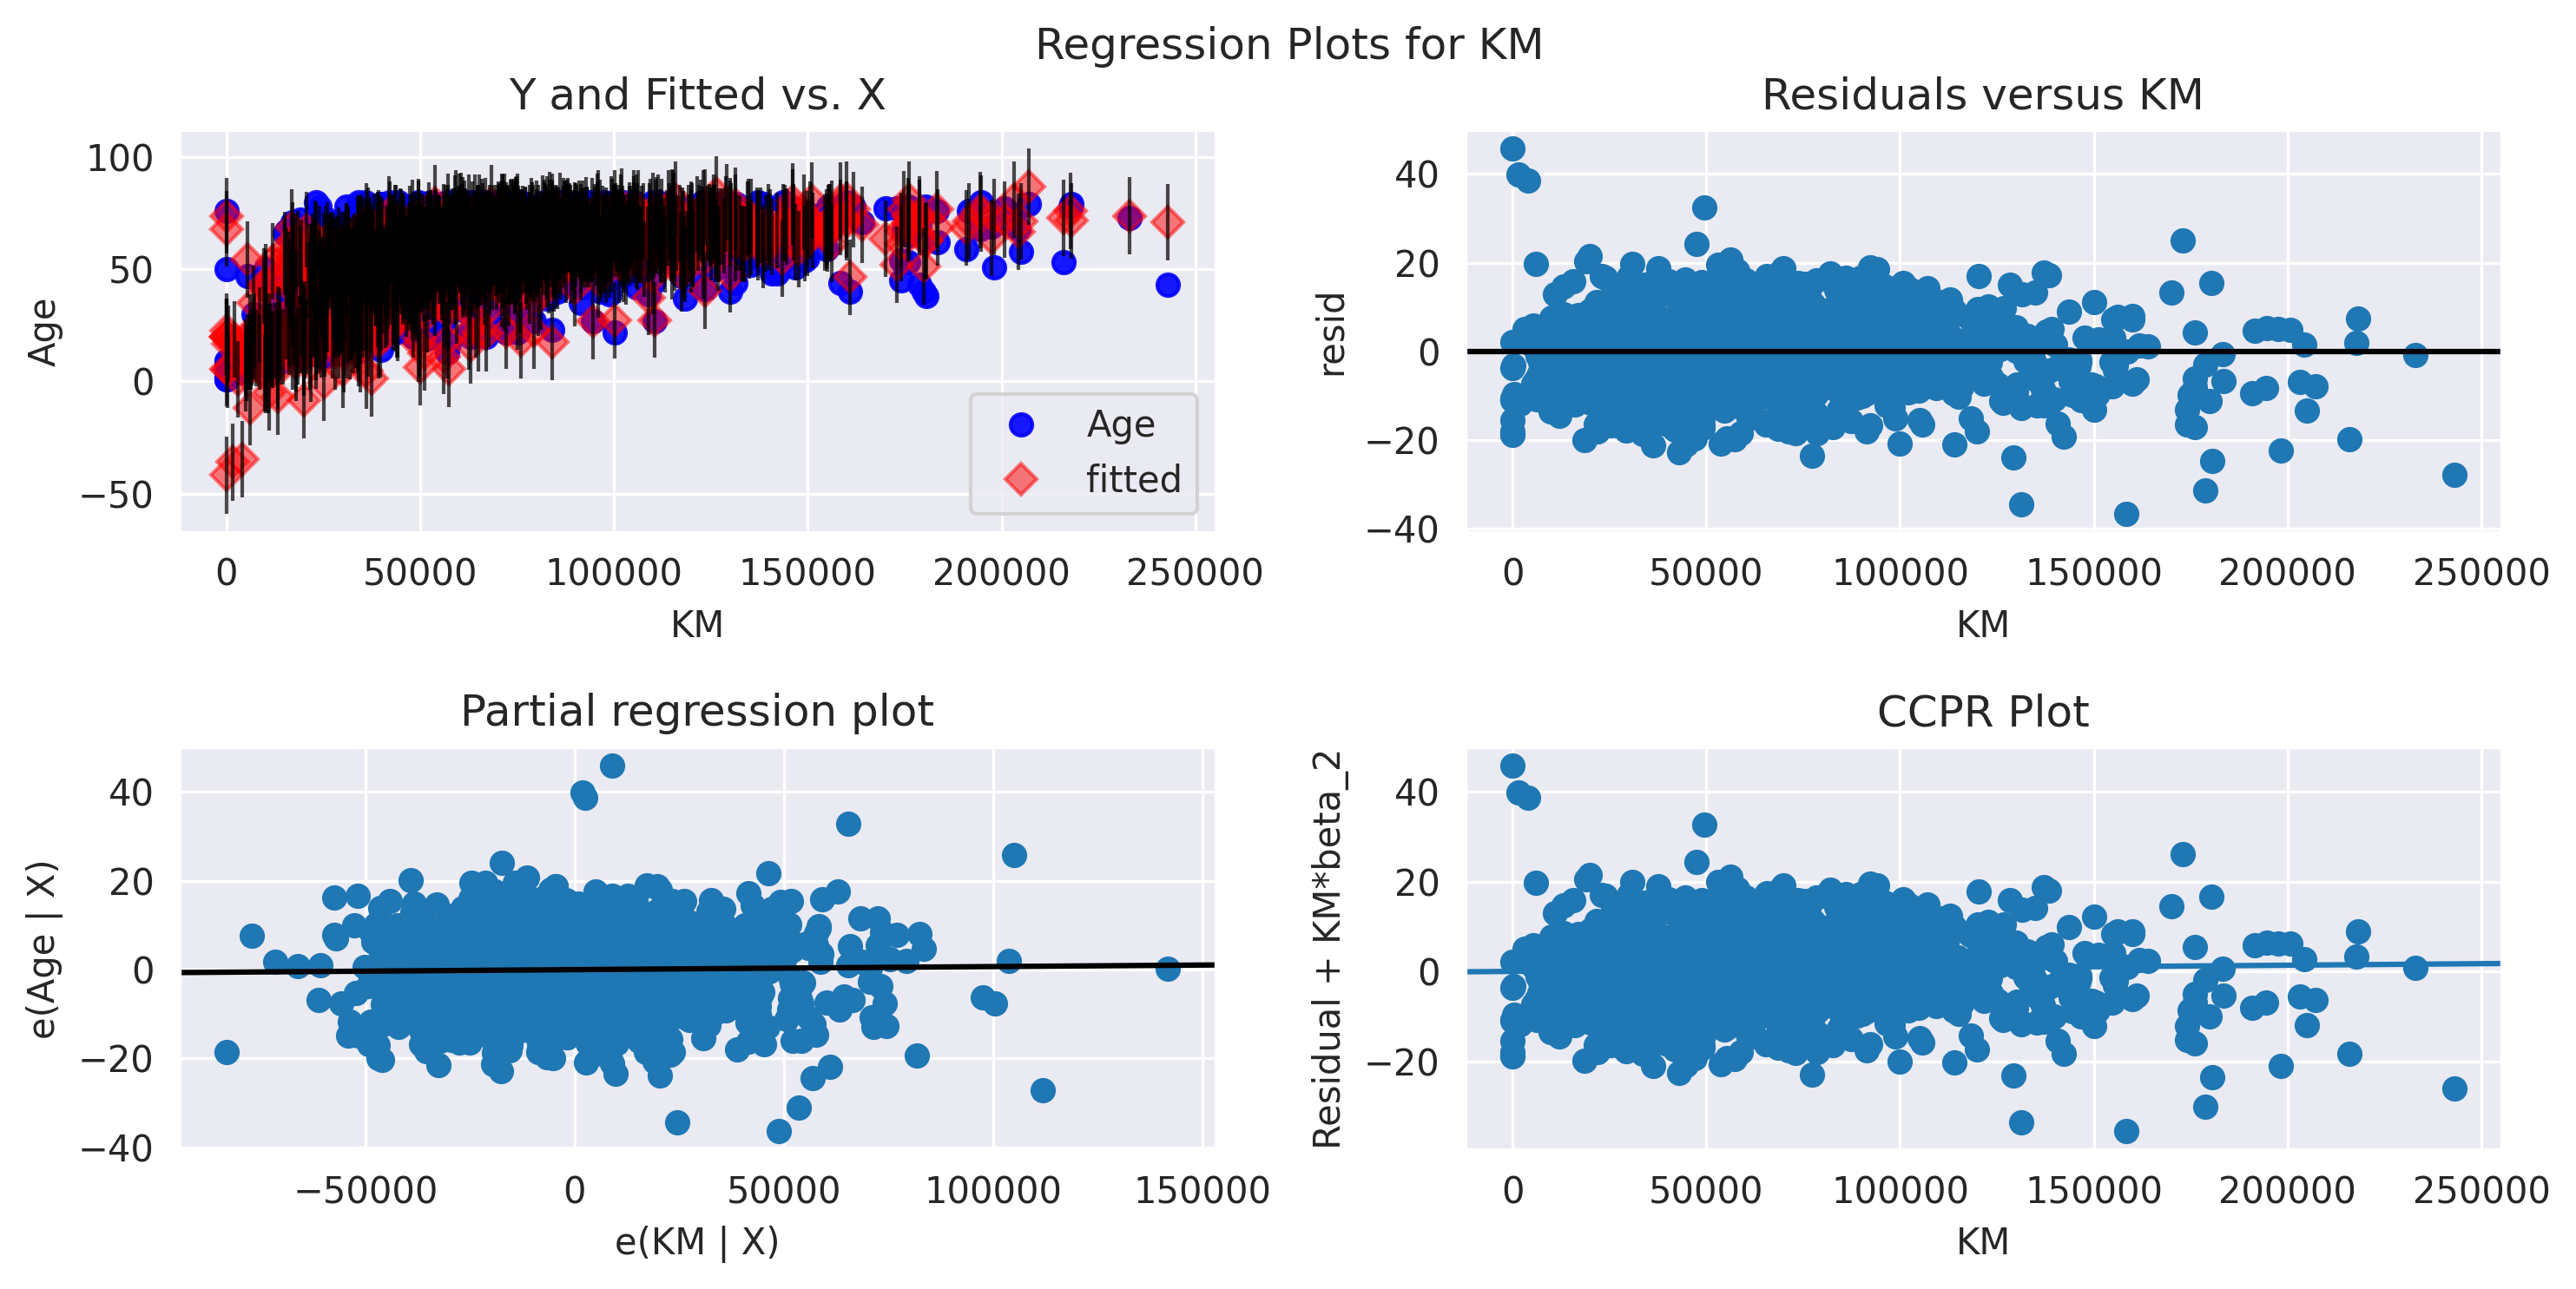

In [ ]:
sm.graphics.plot_regress_exog(Price,'KM')

eval_env: 1


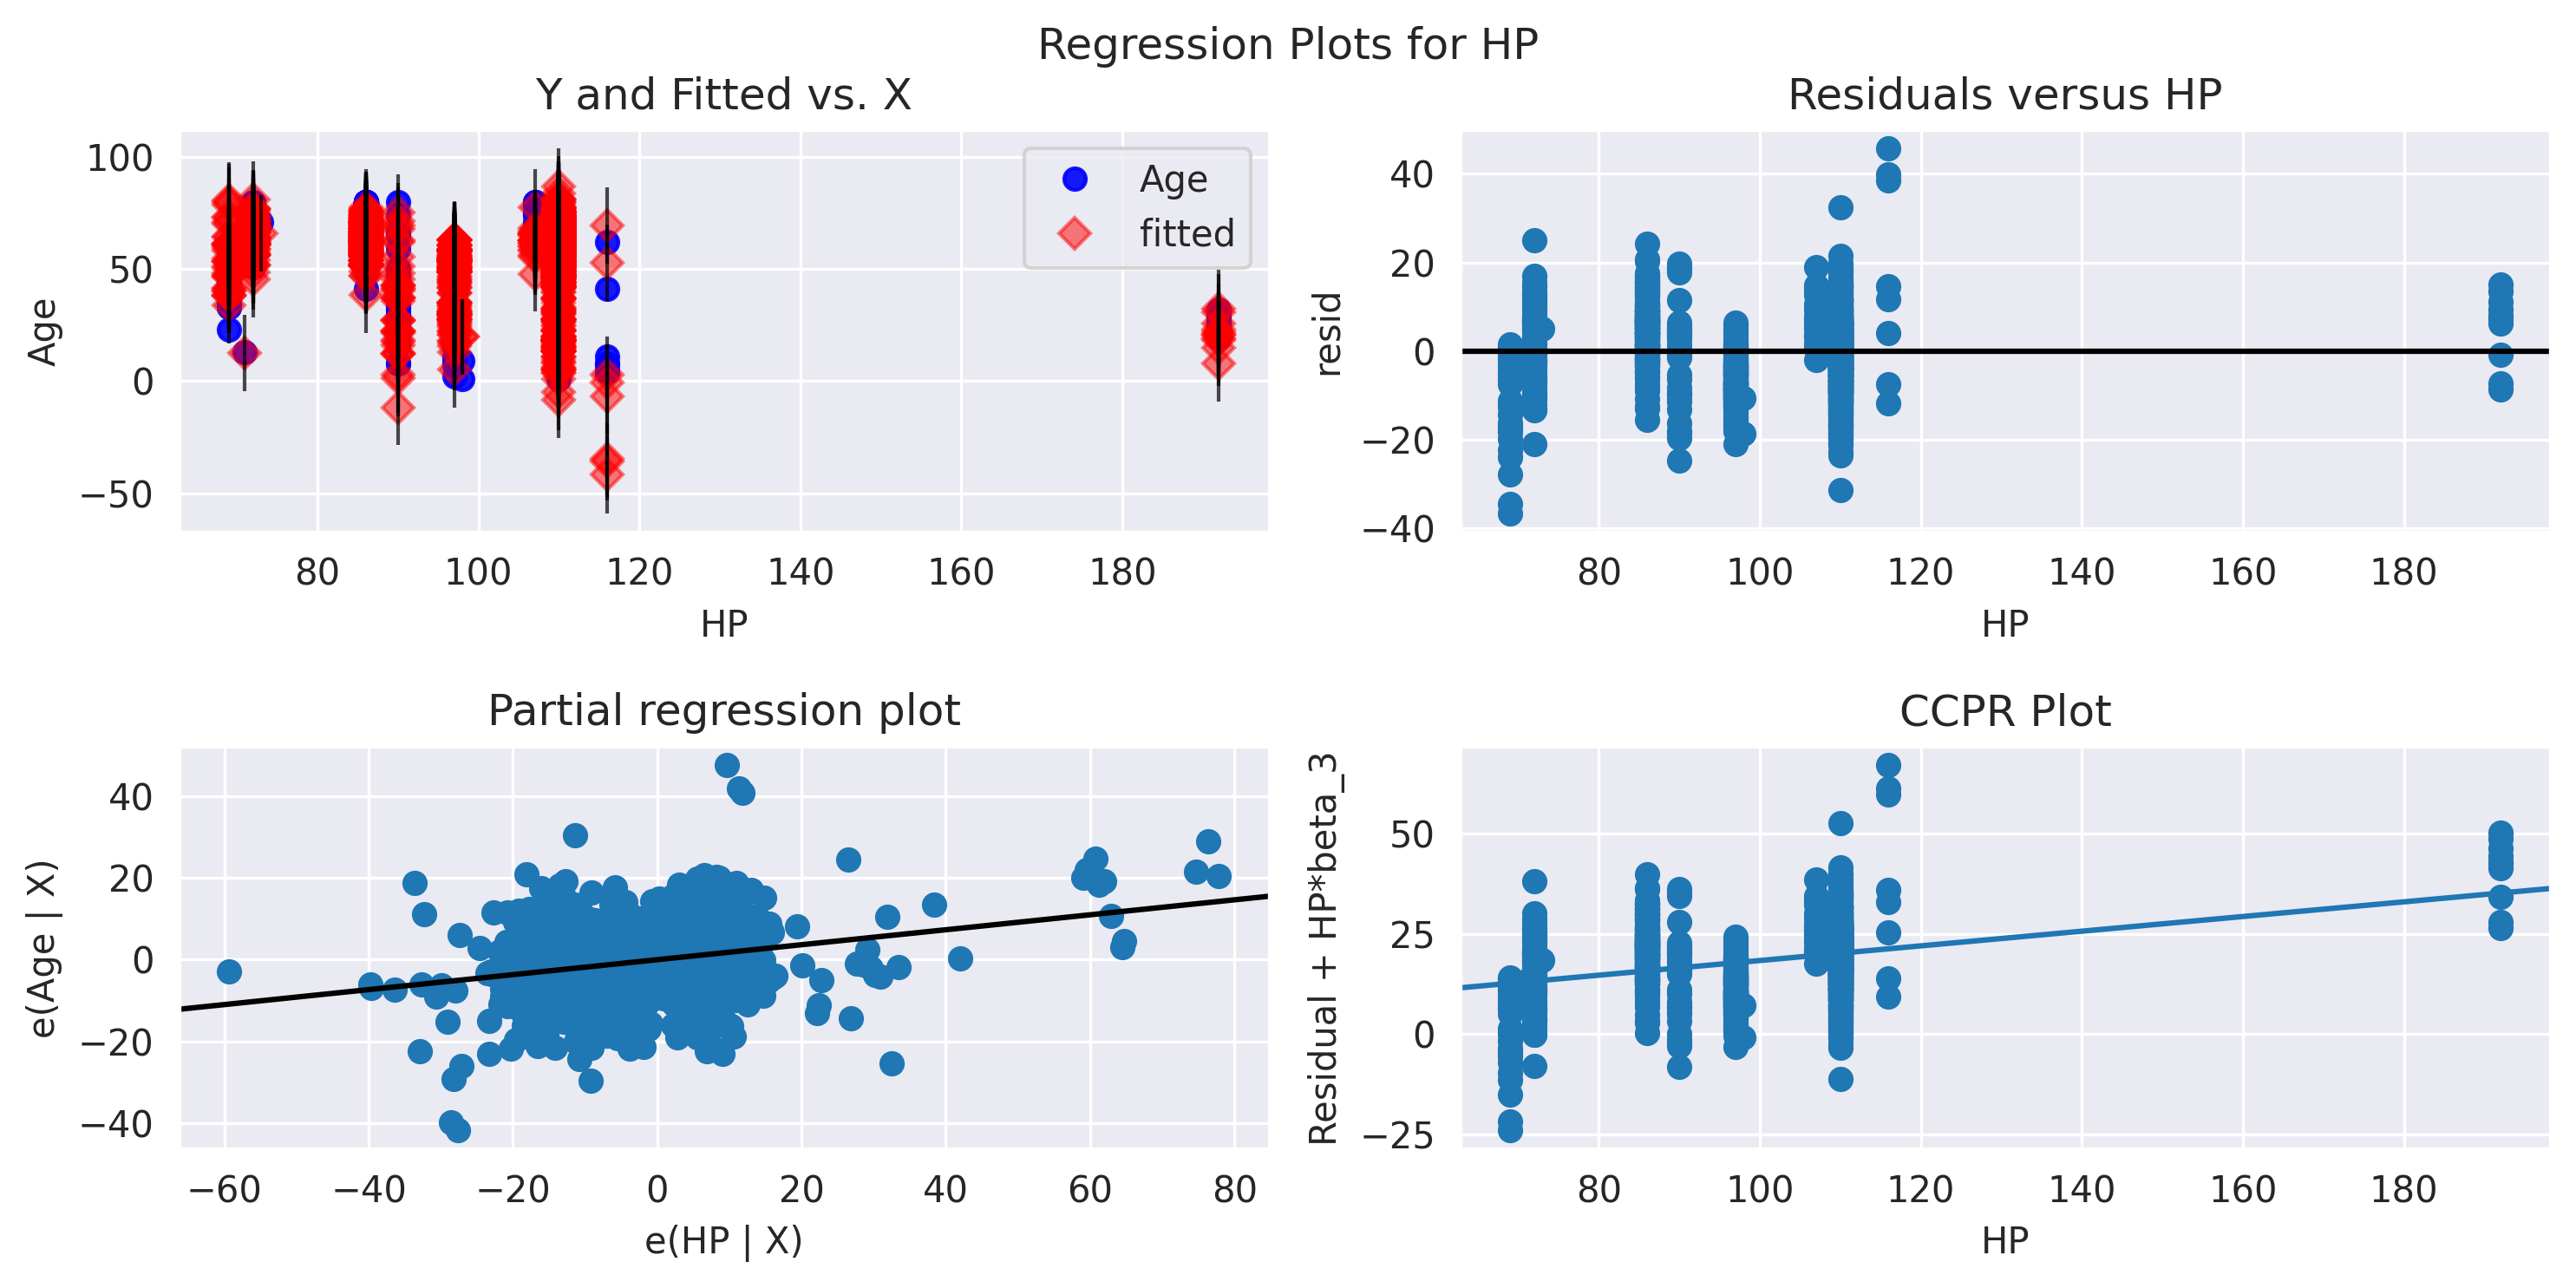

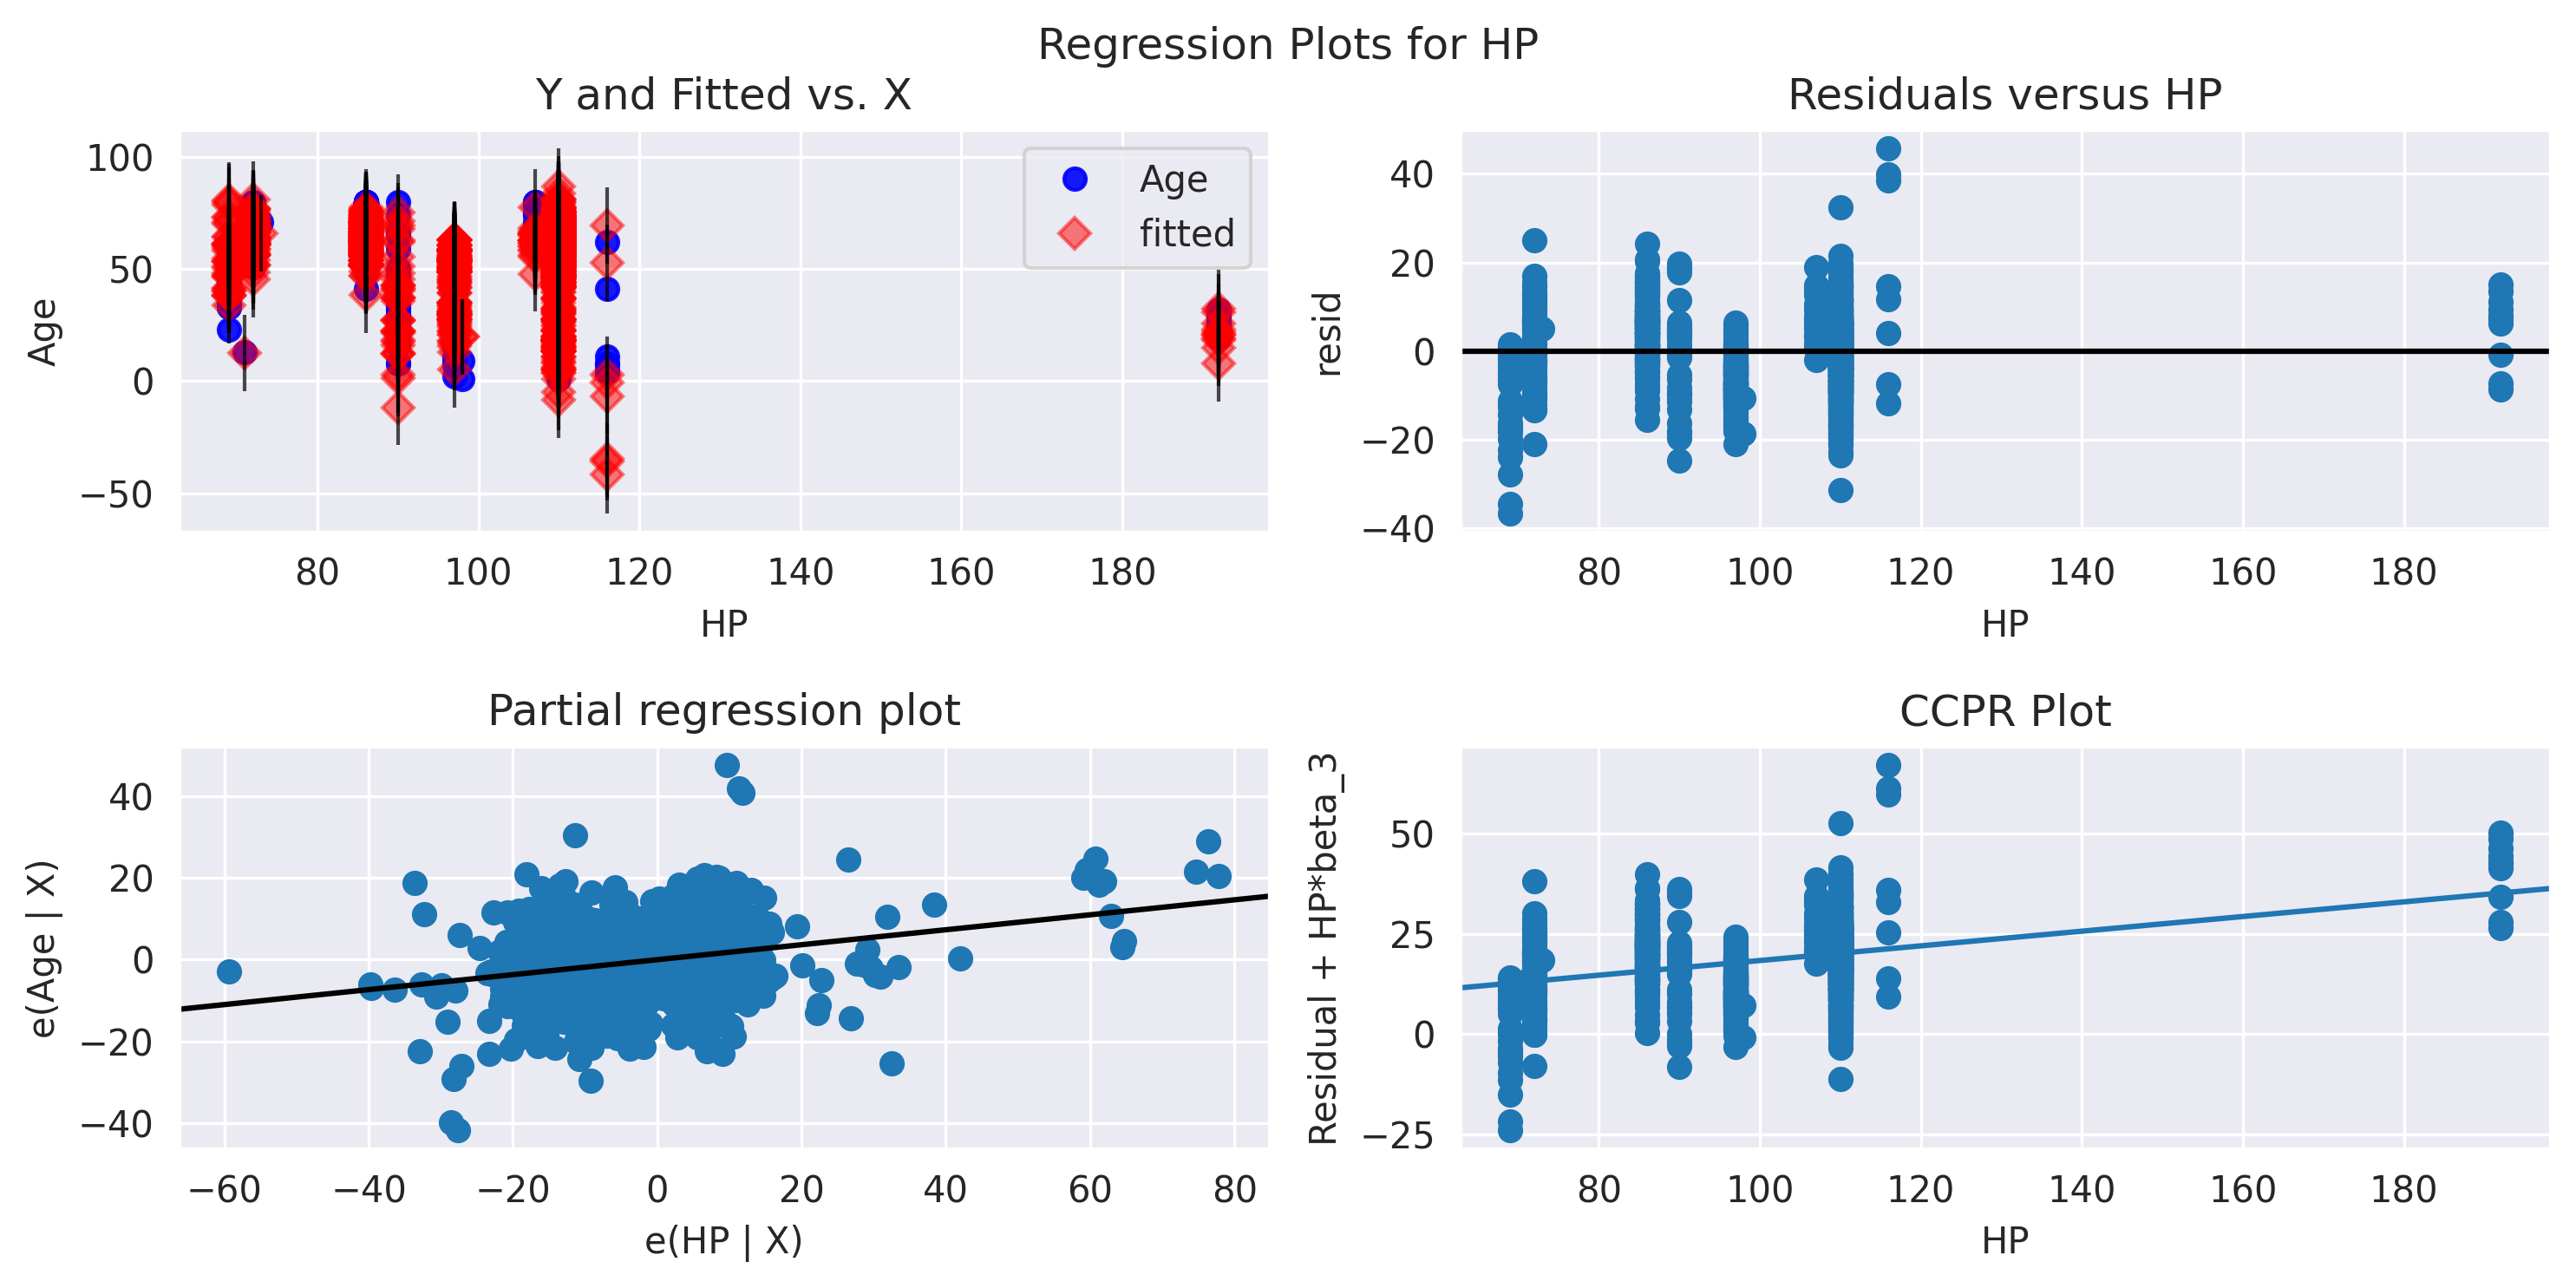

In [ ]:
sm.graphics.plot_regress_exog(Price,'HP')

eval_env: 1


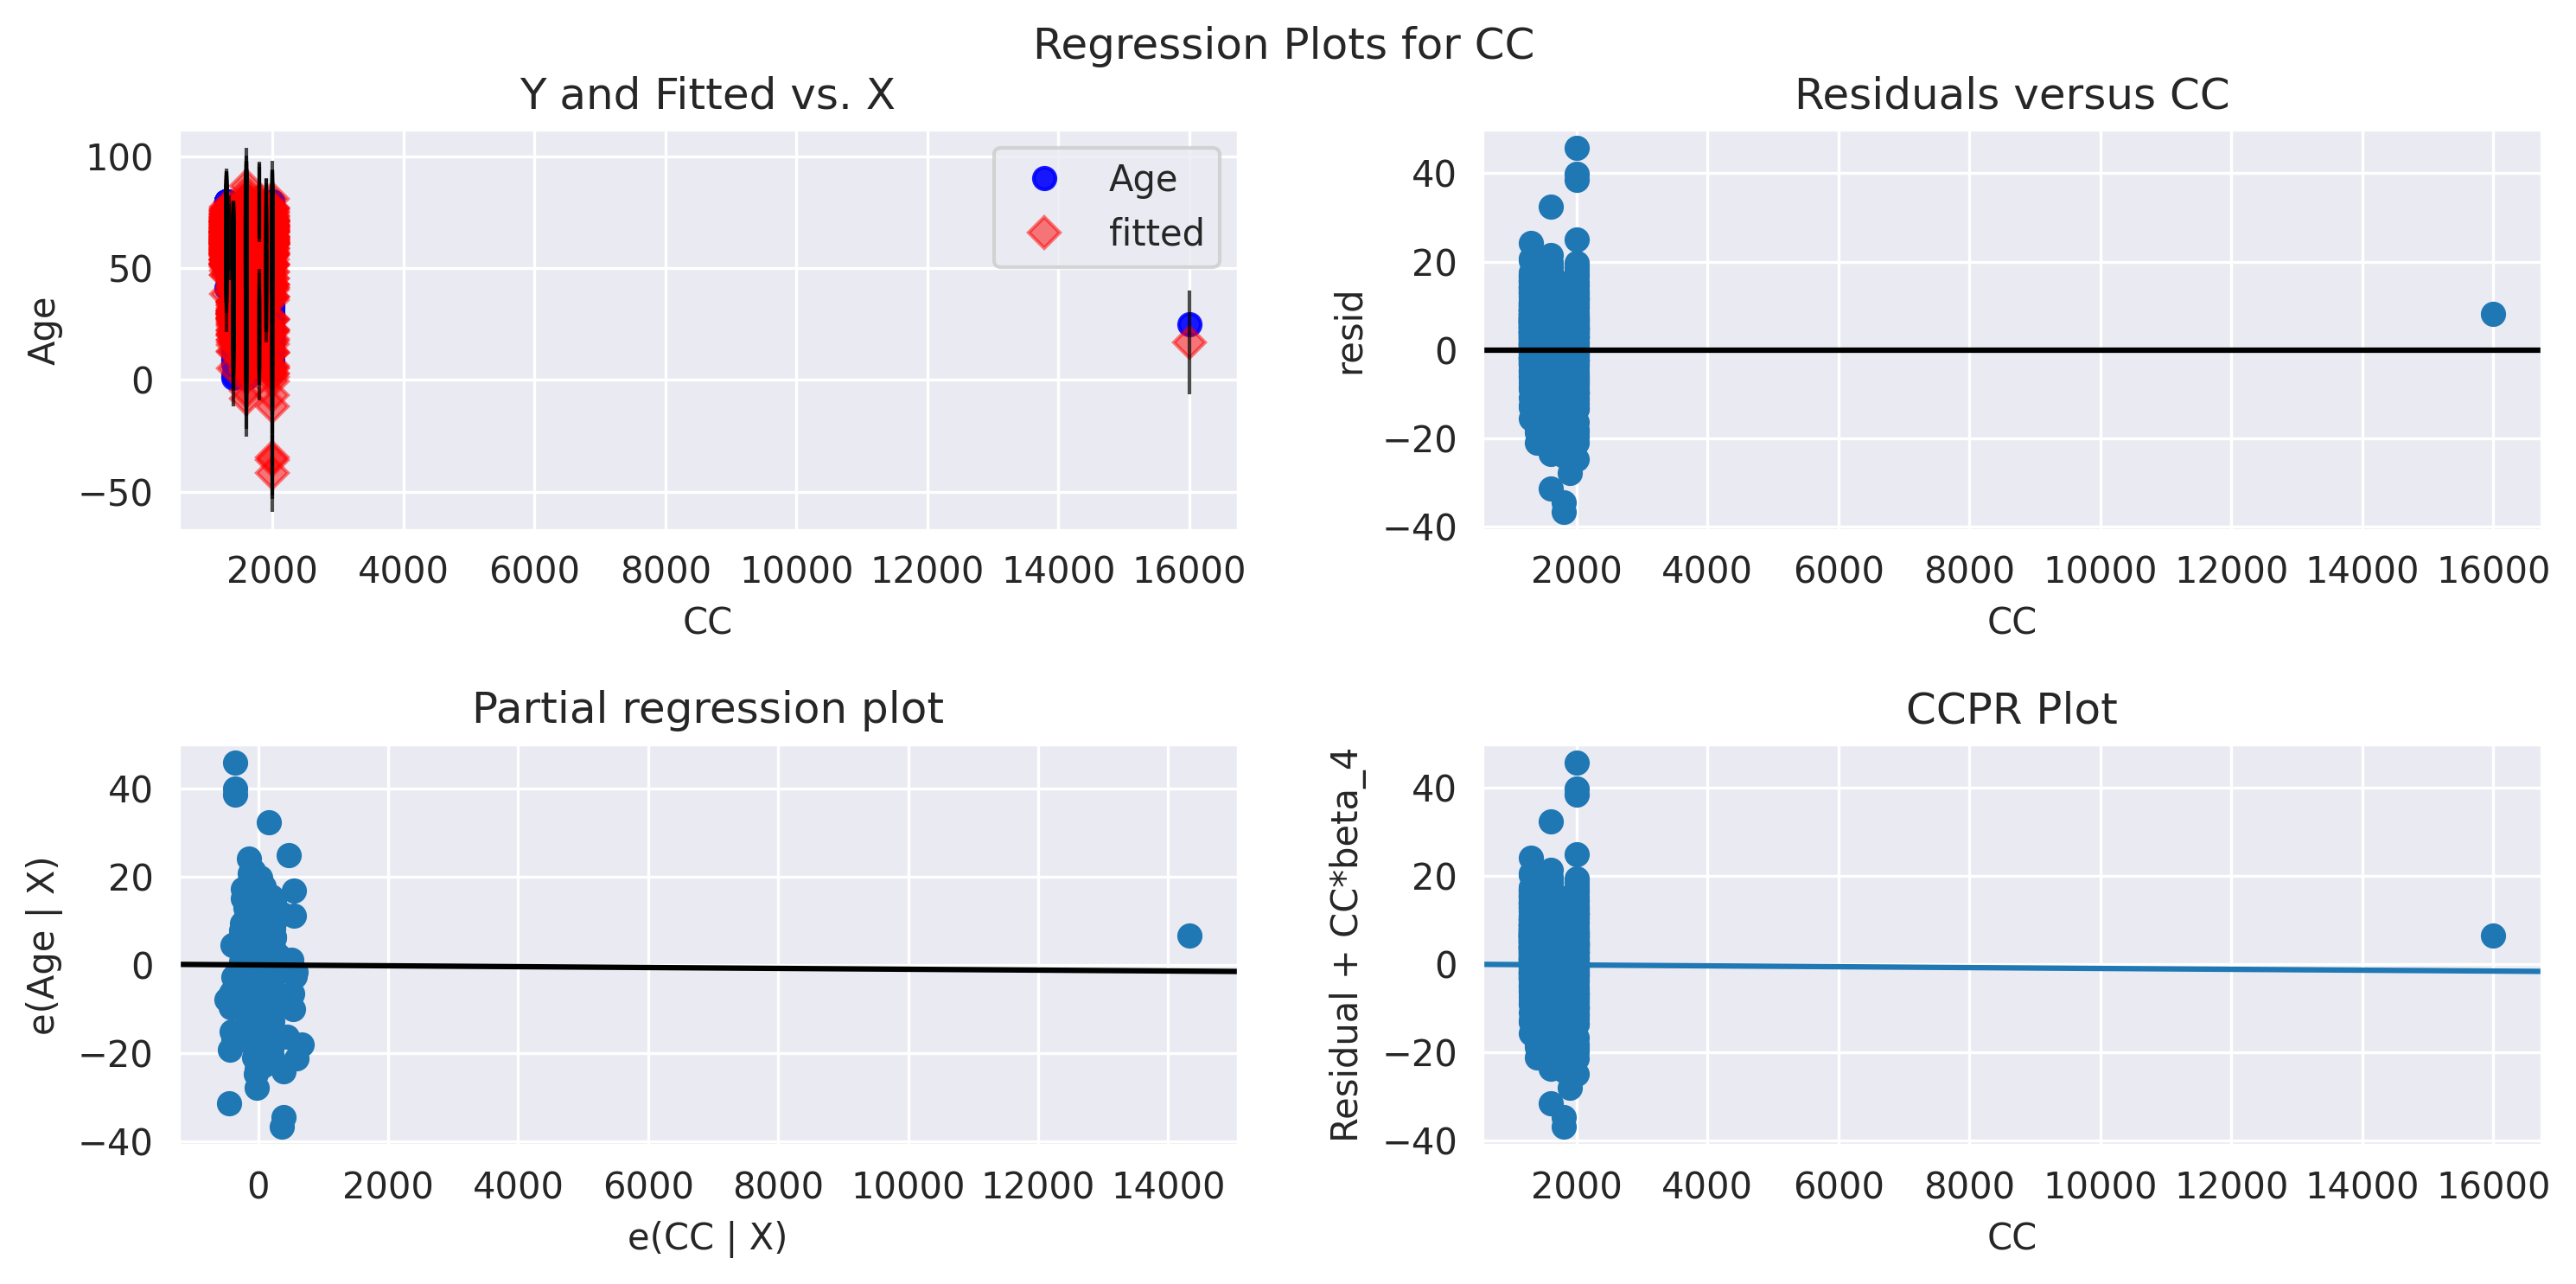

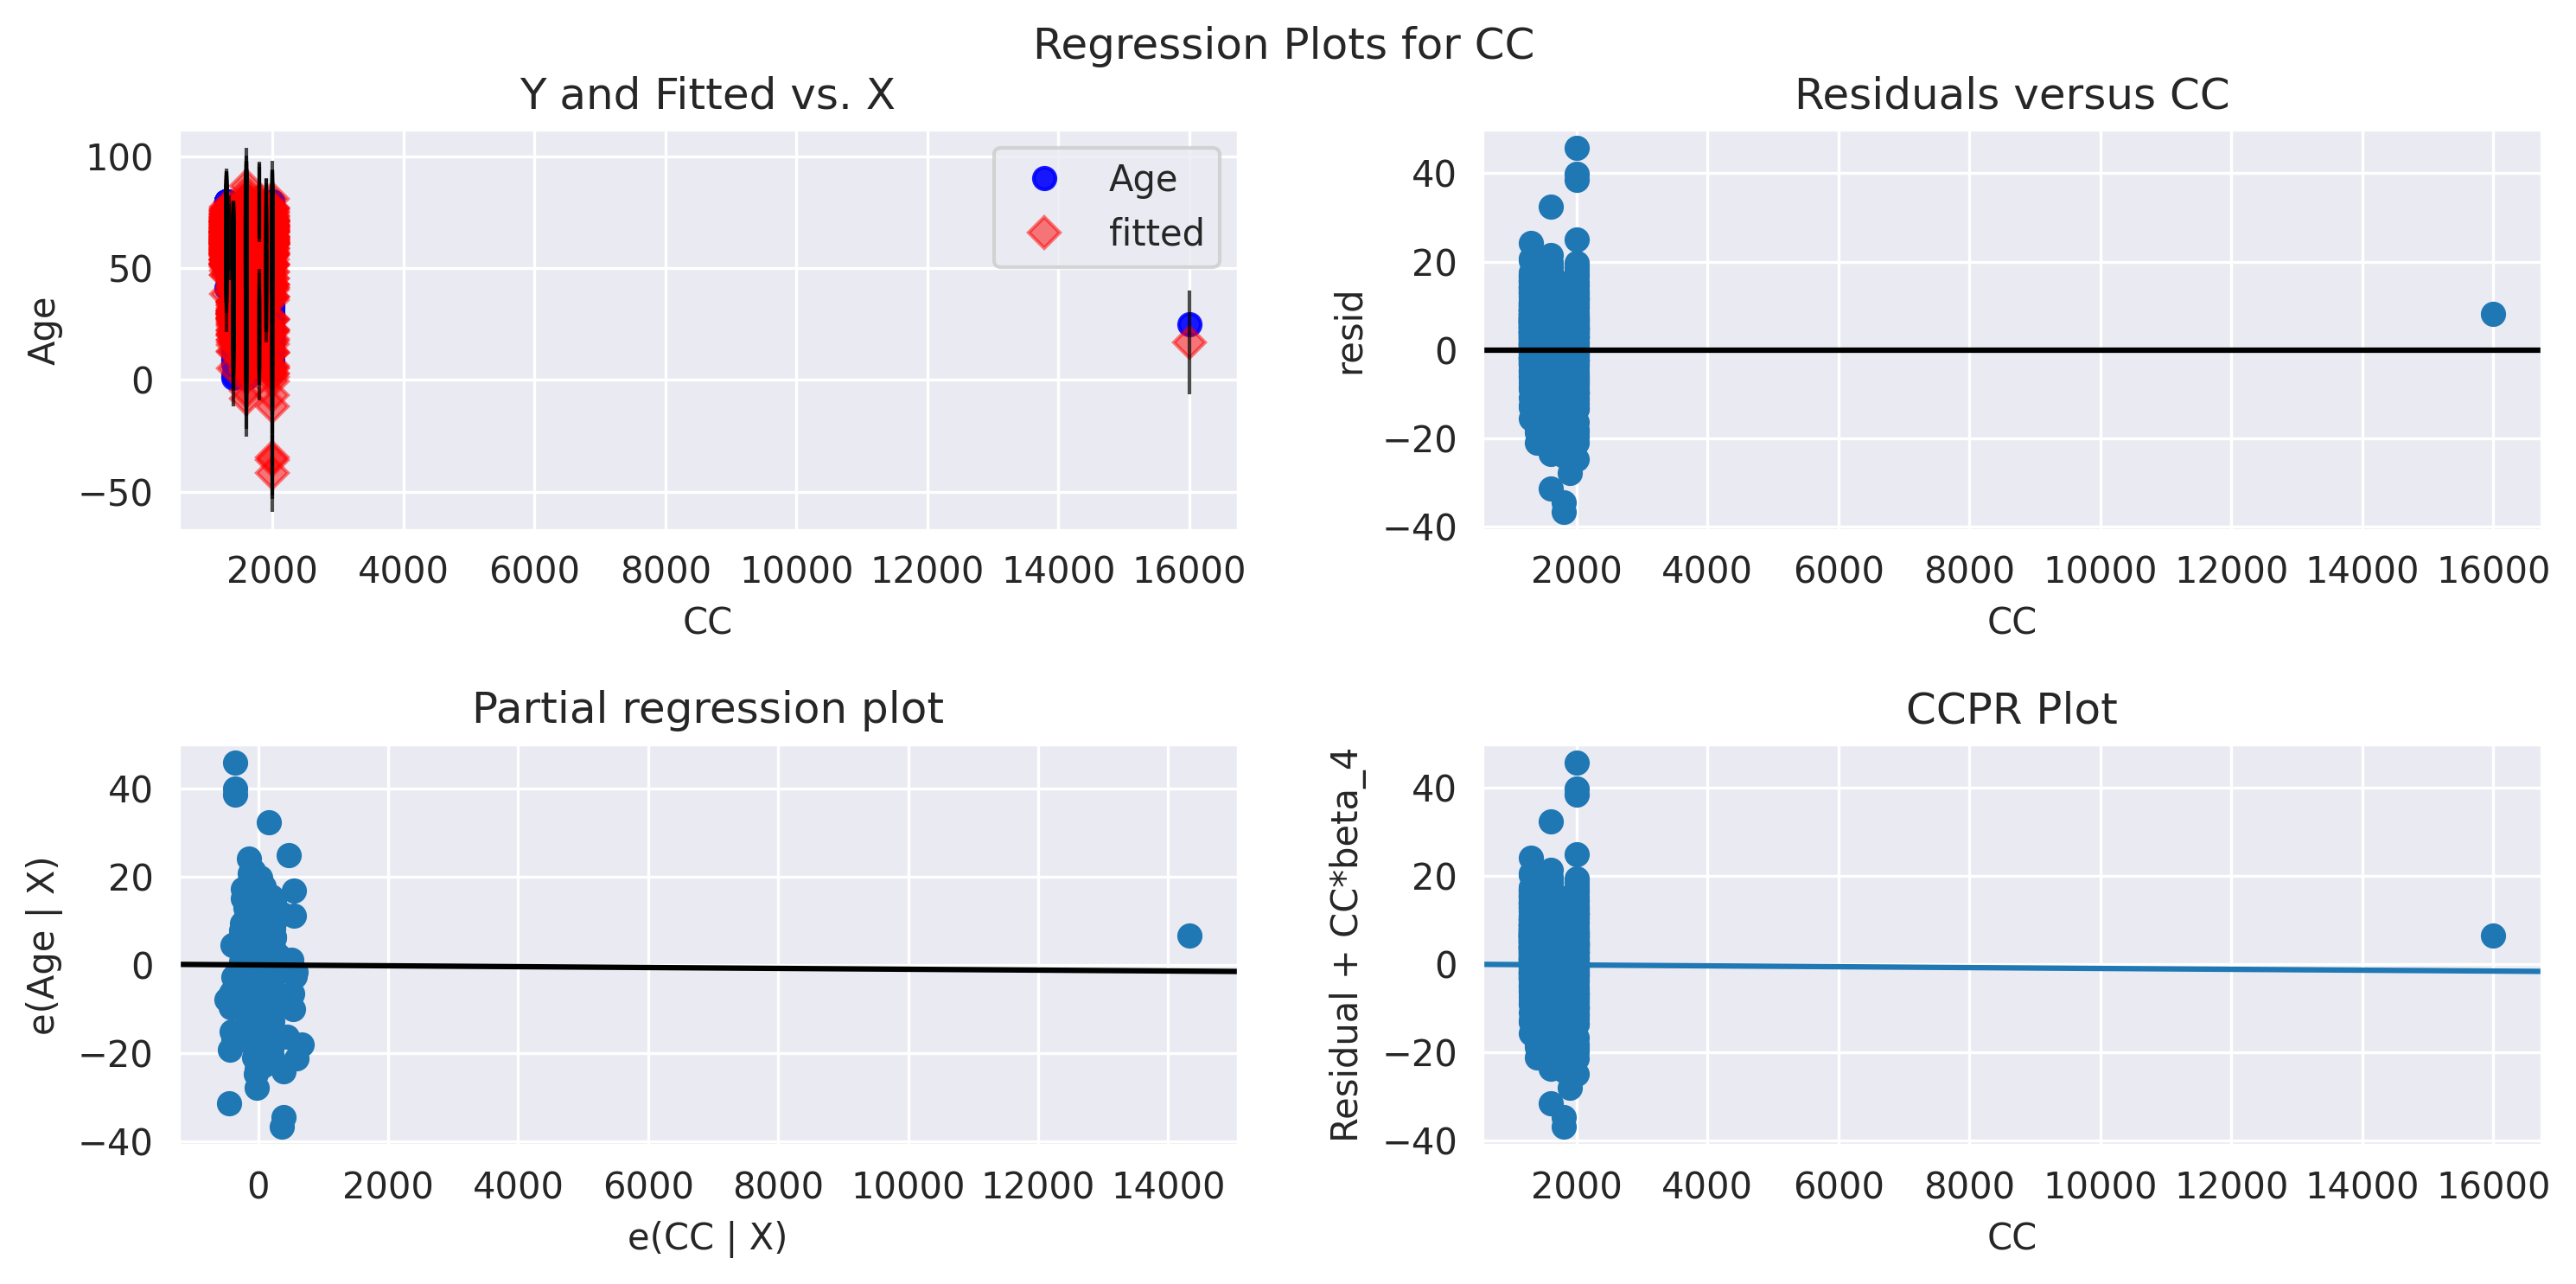

In [ ]:
sm.graphics.plot_regress_exog(Price,'CC')

eval_env: 1


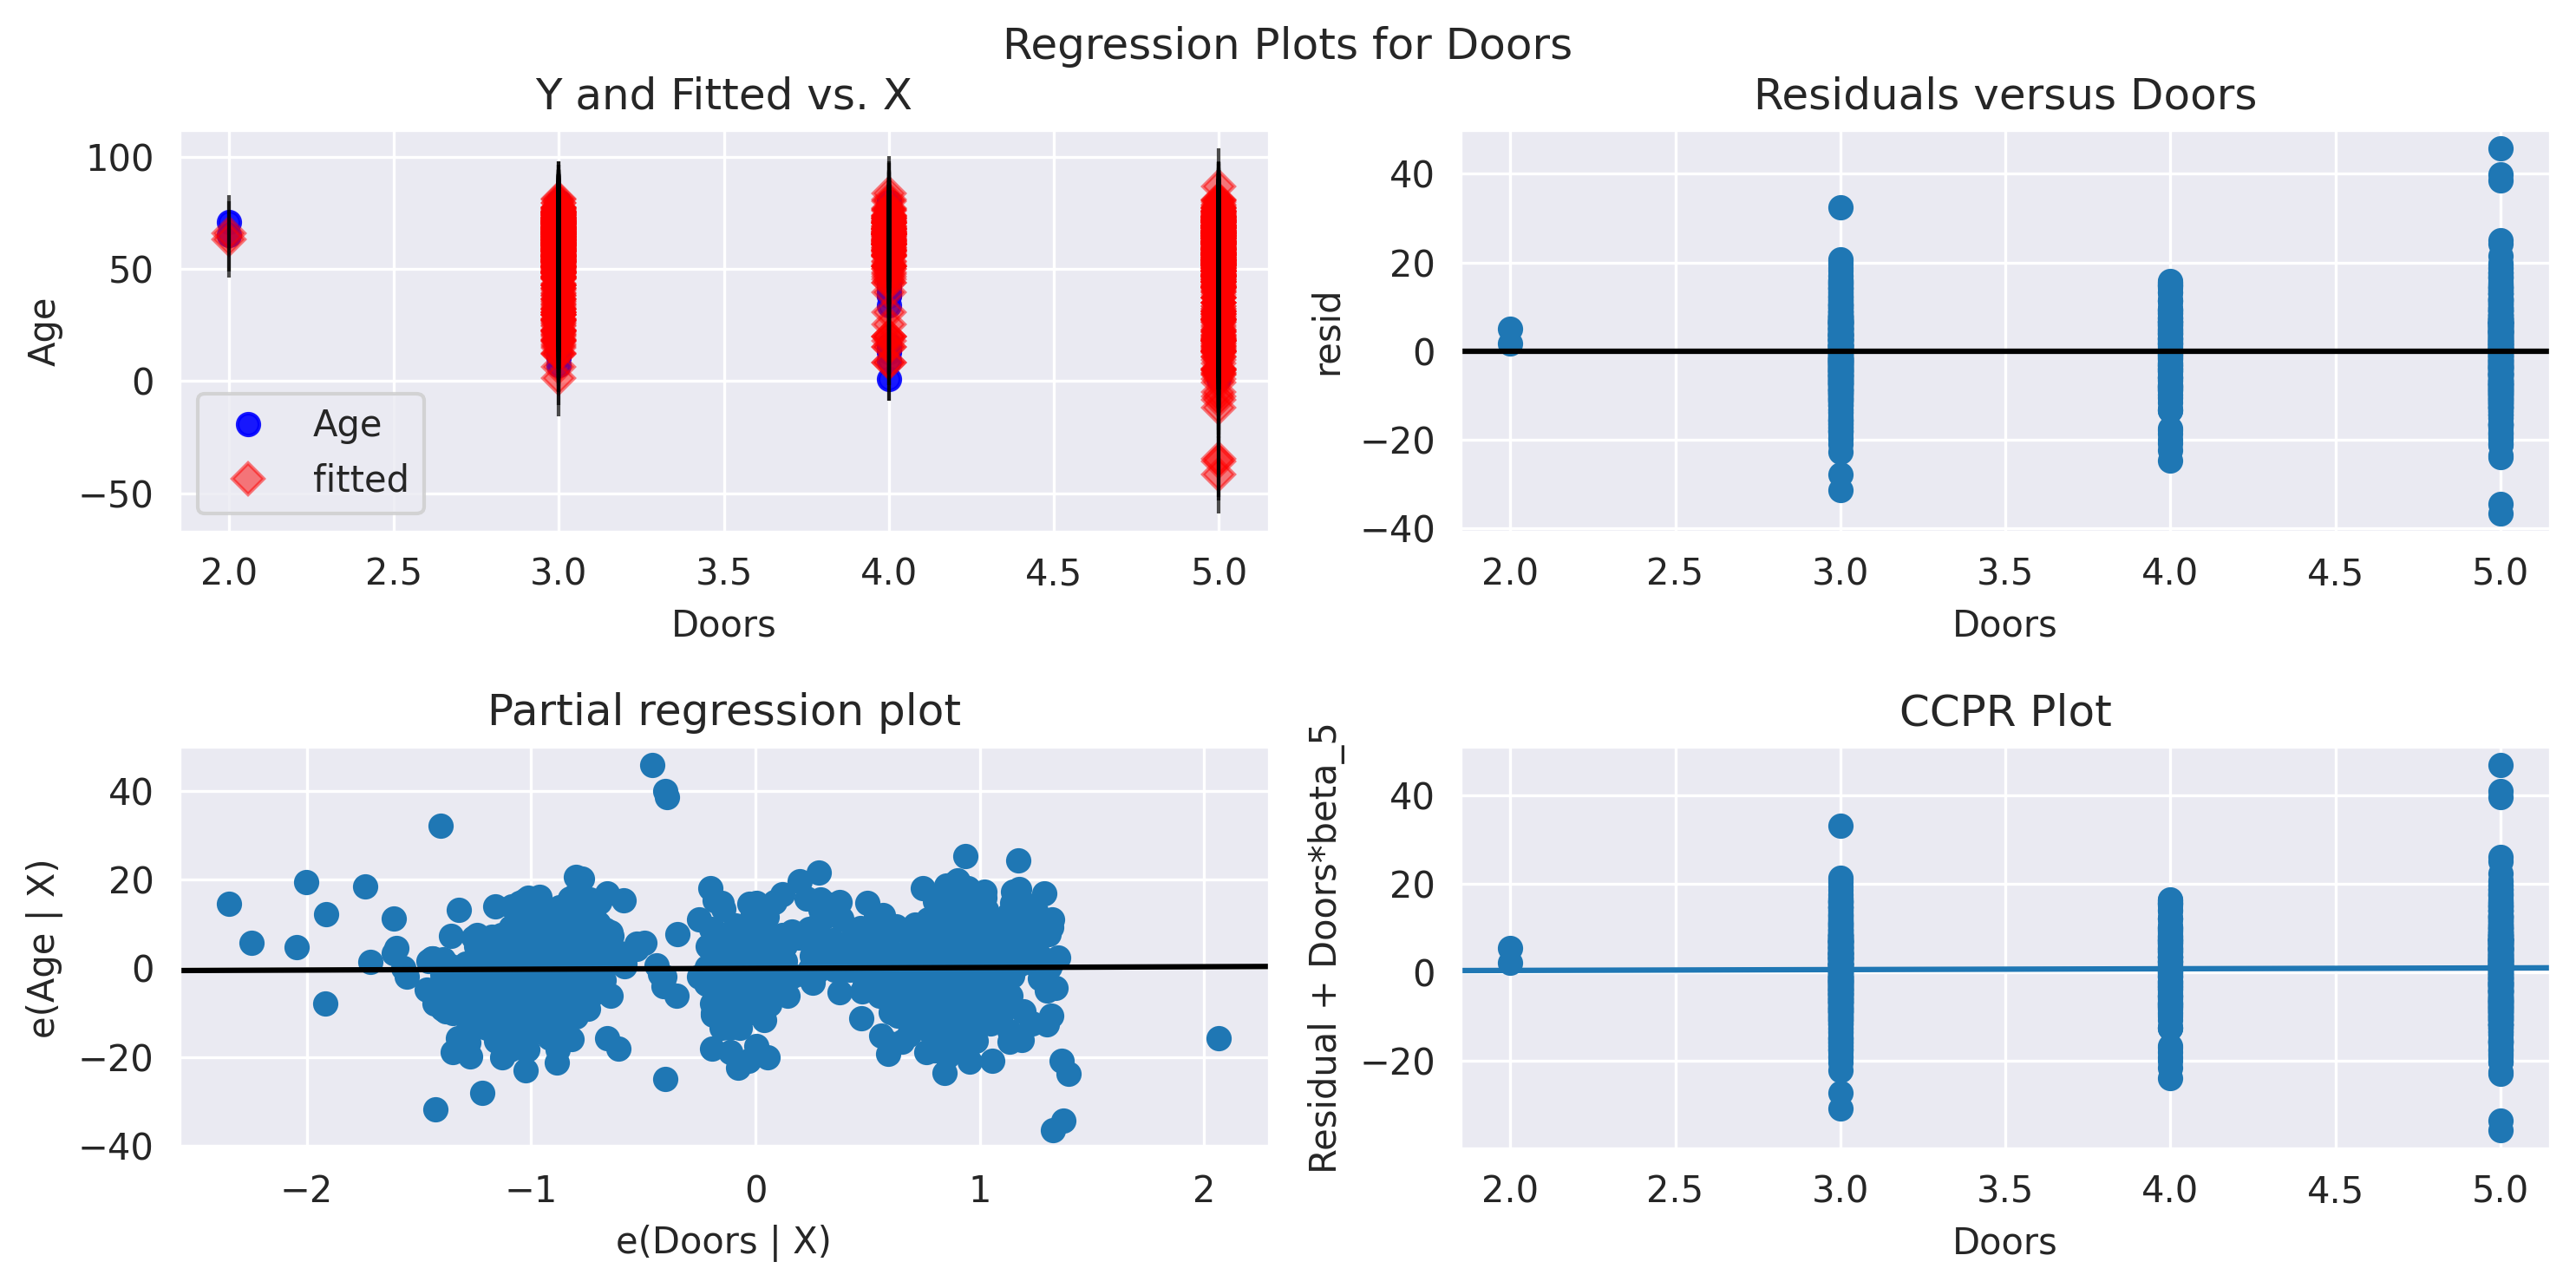

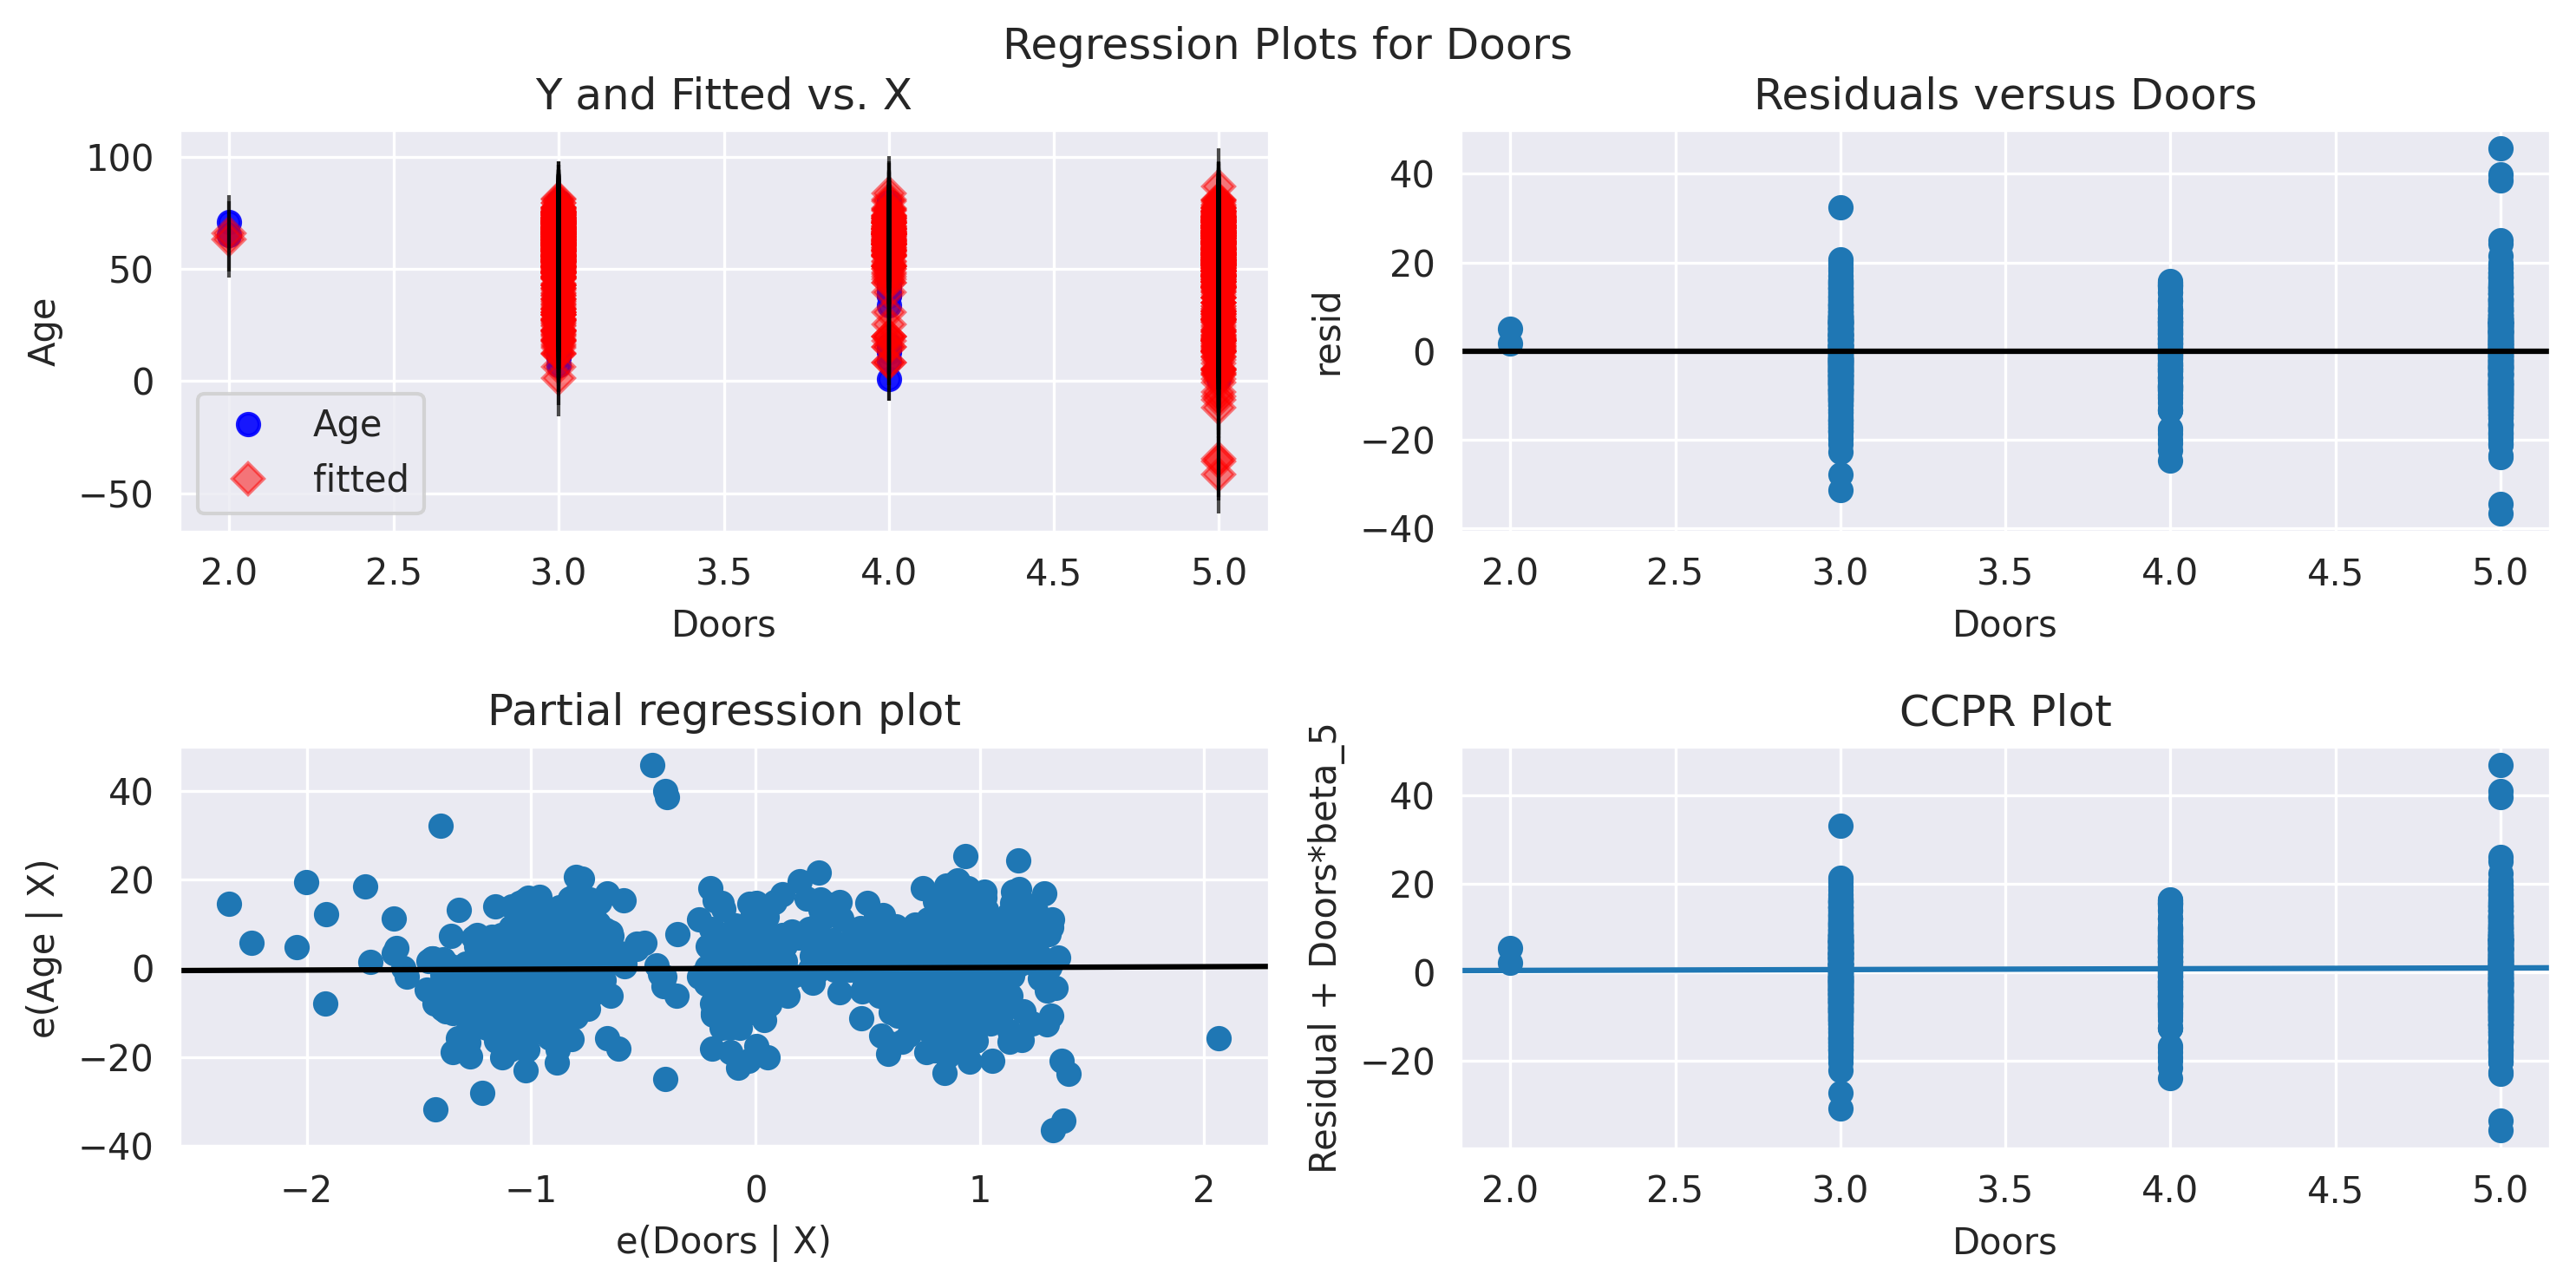

In [ ]:
sm.graphics.plot_regress_exog(Price,'Doors')

eval_env: 1


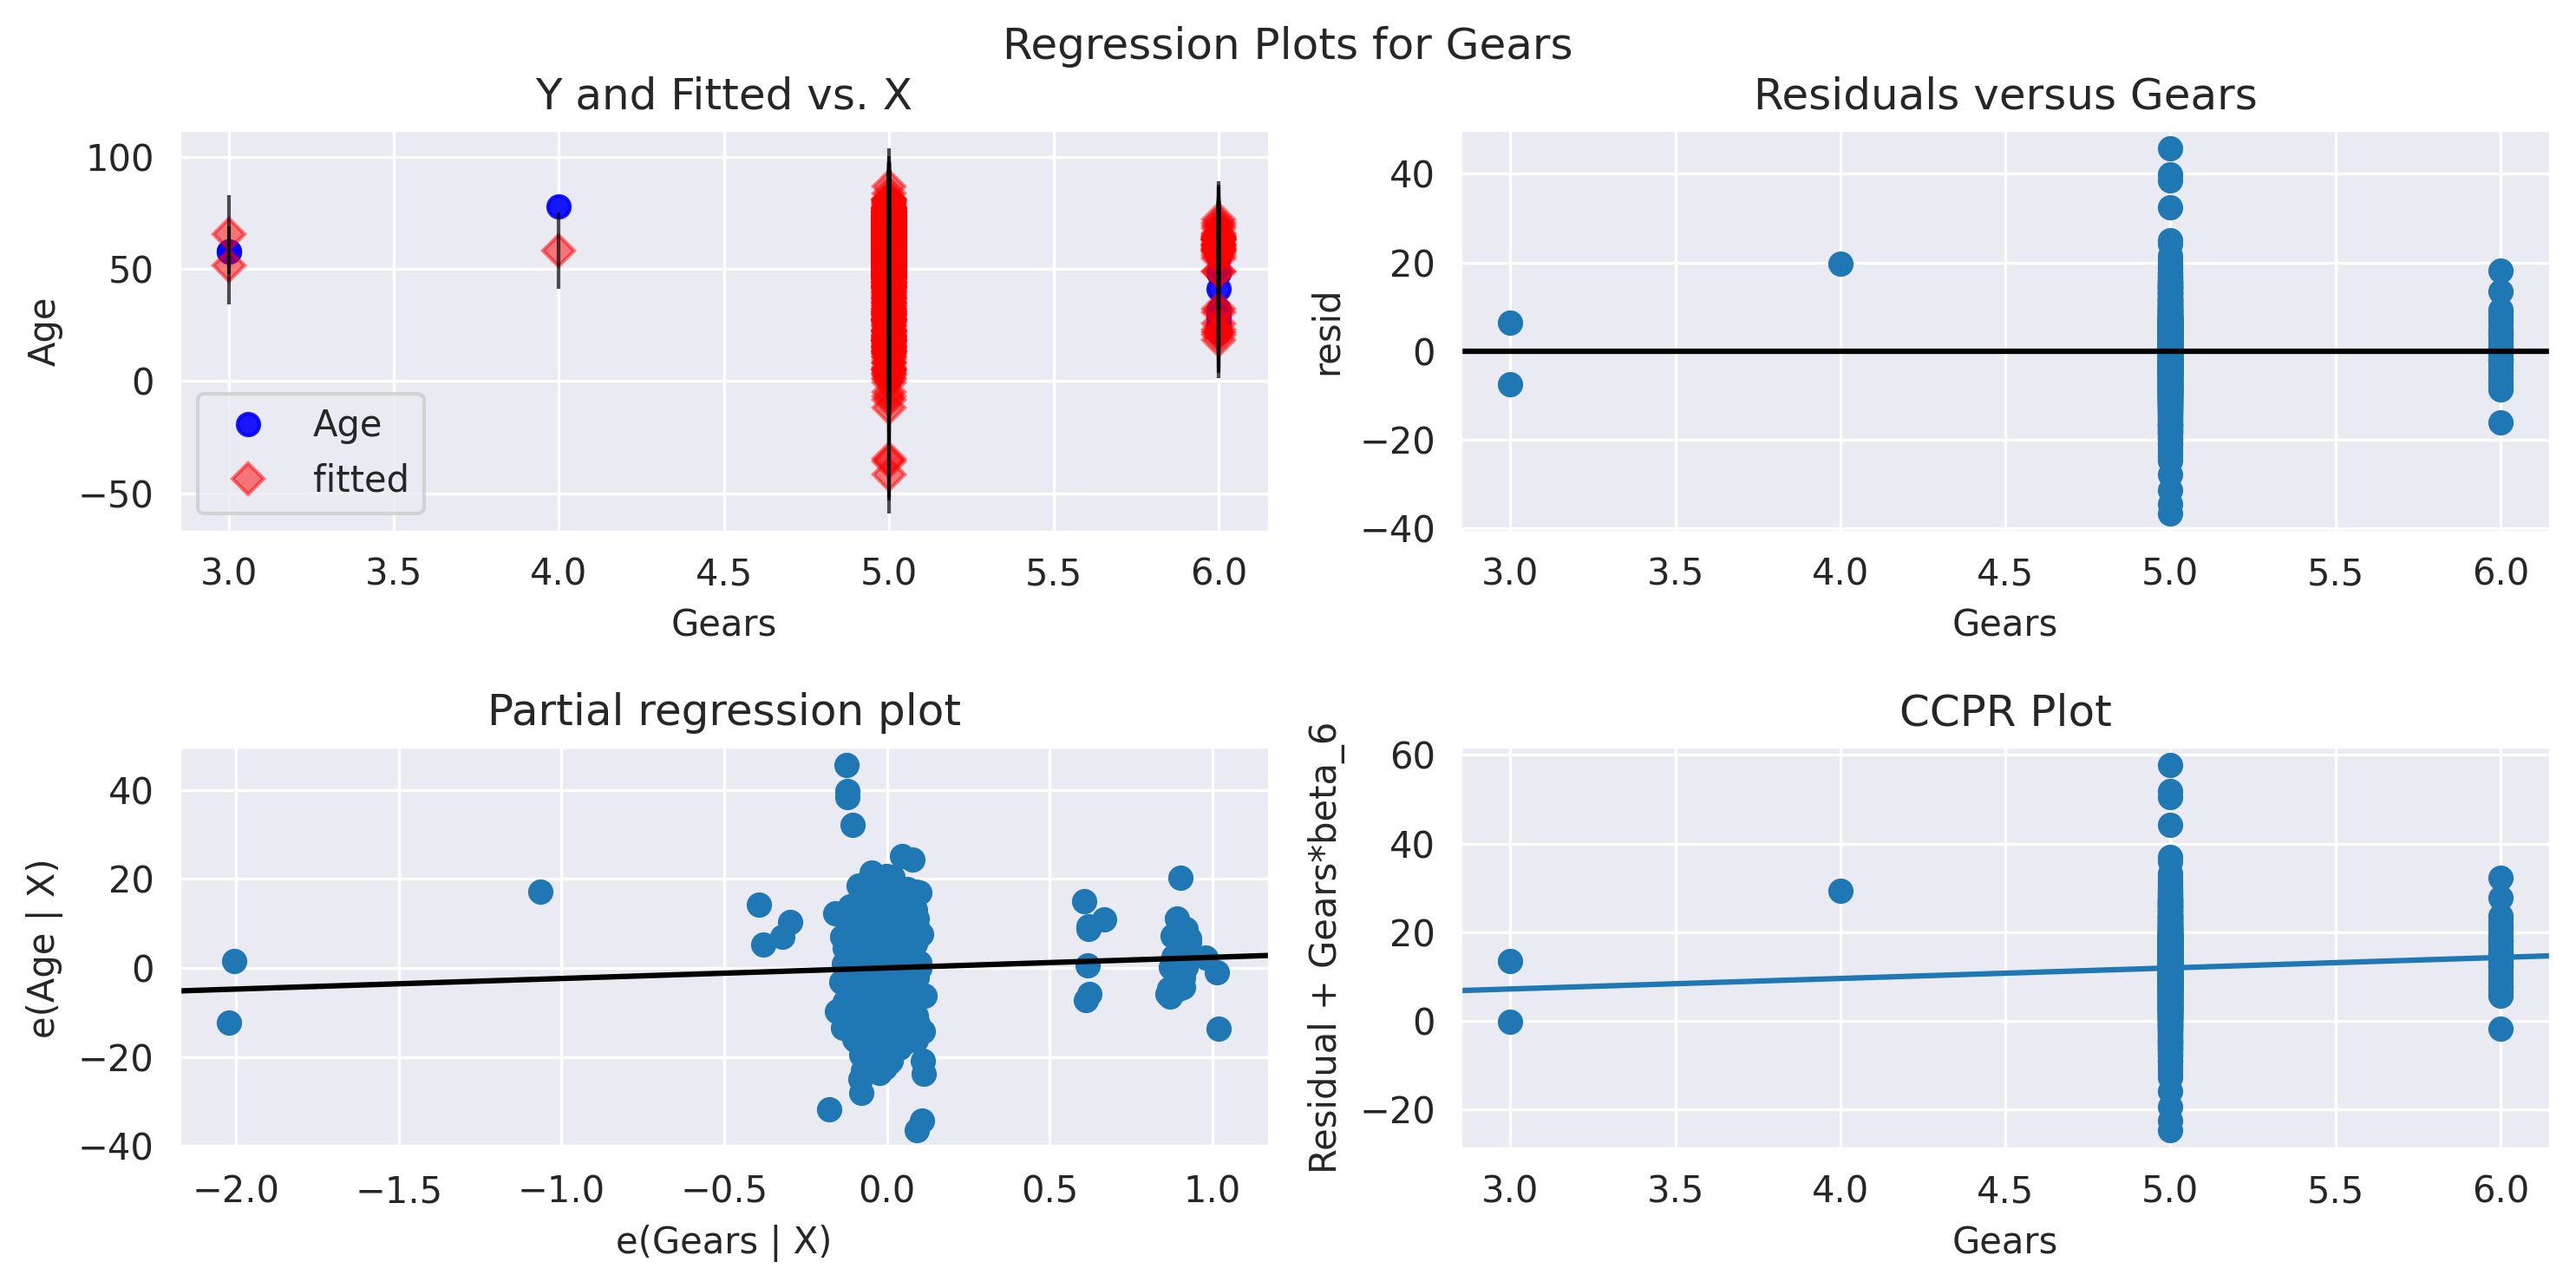

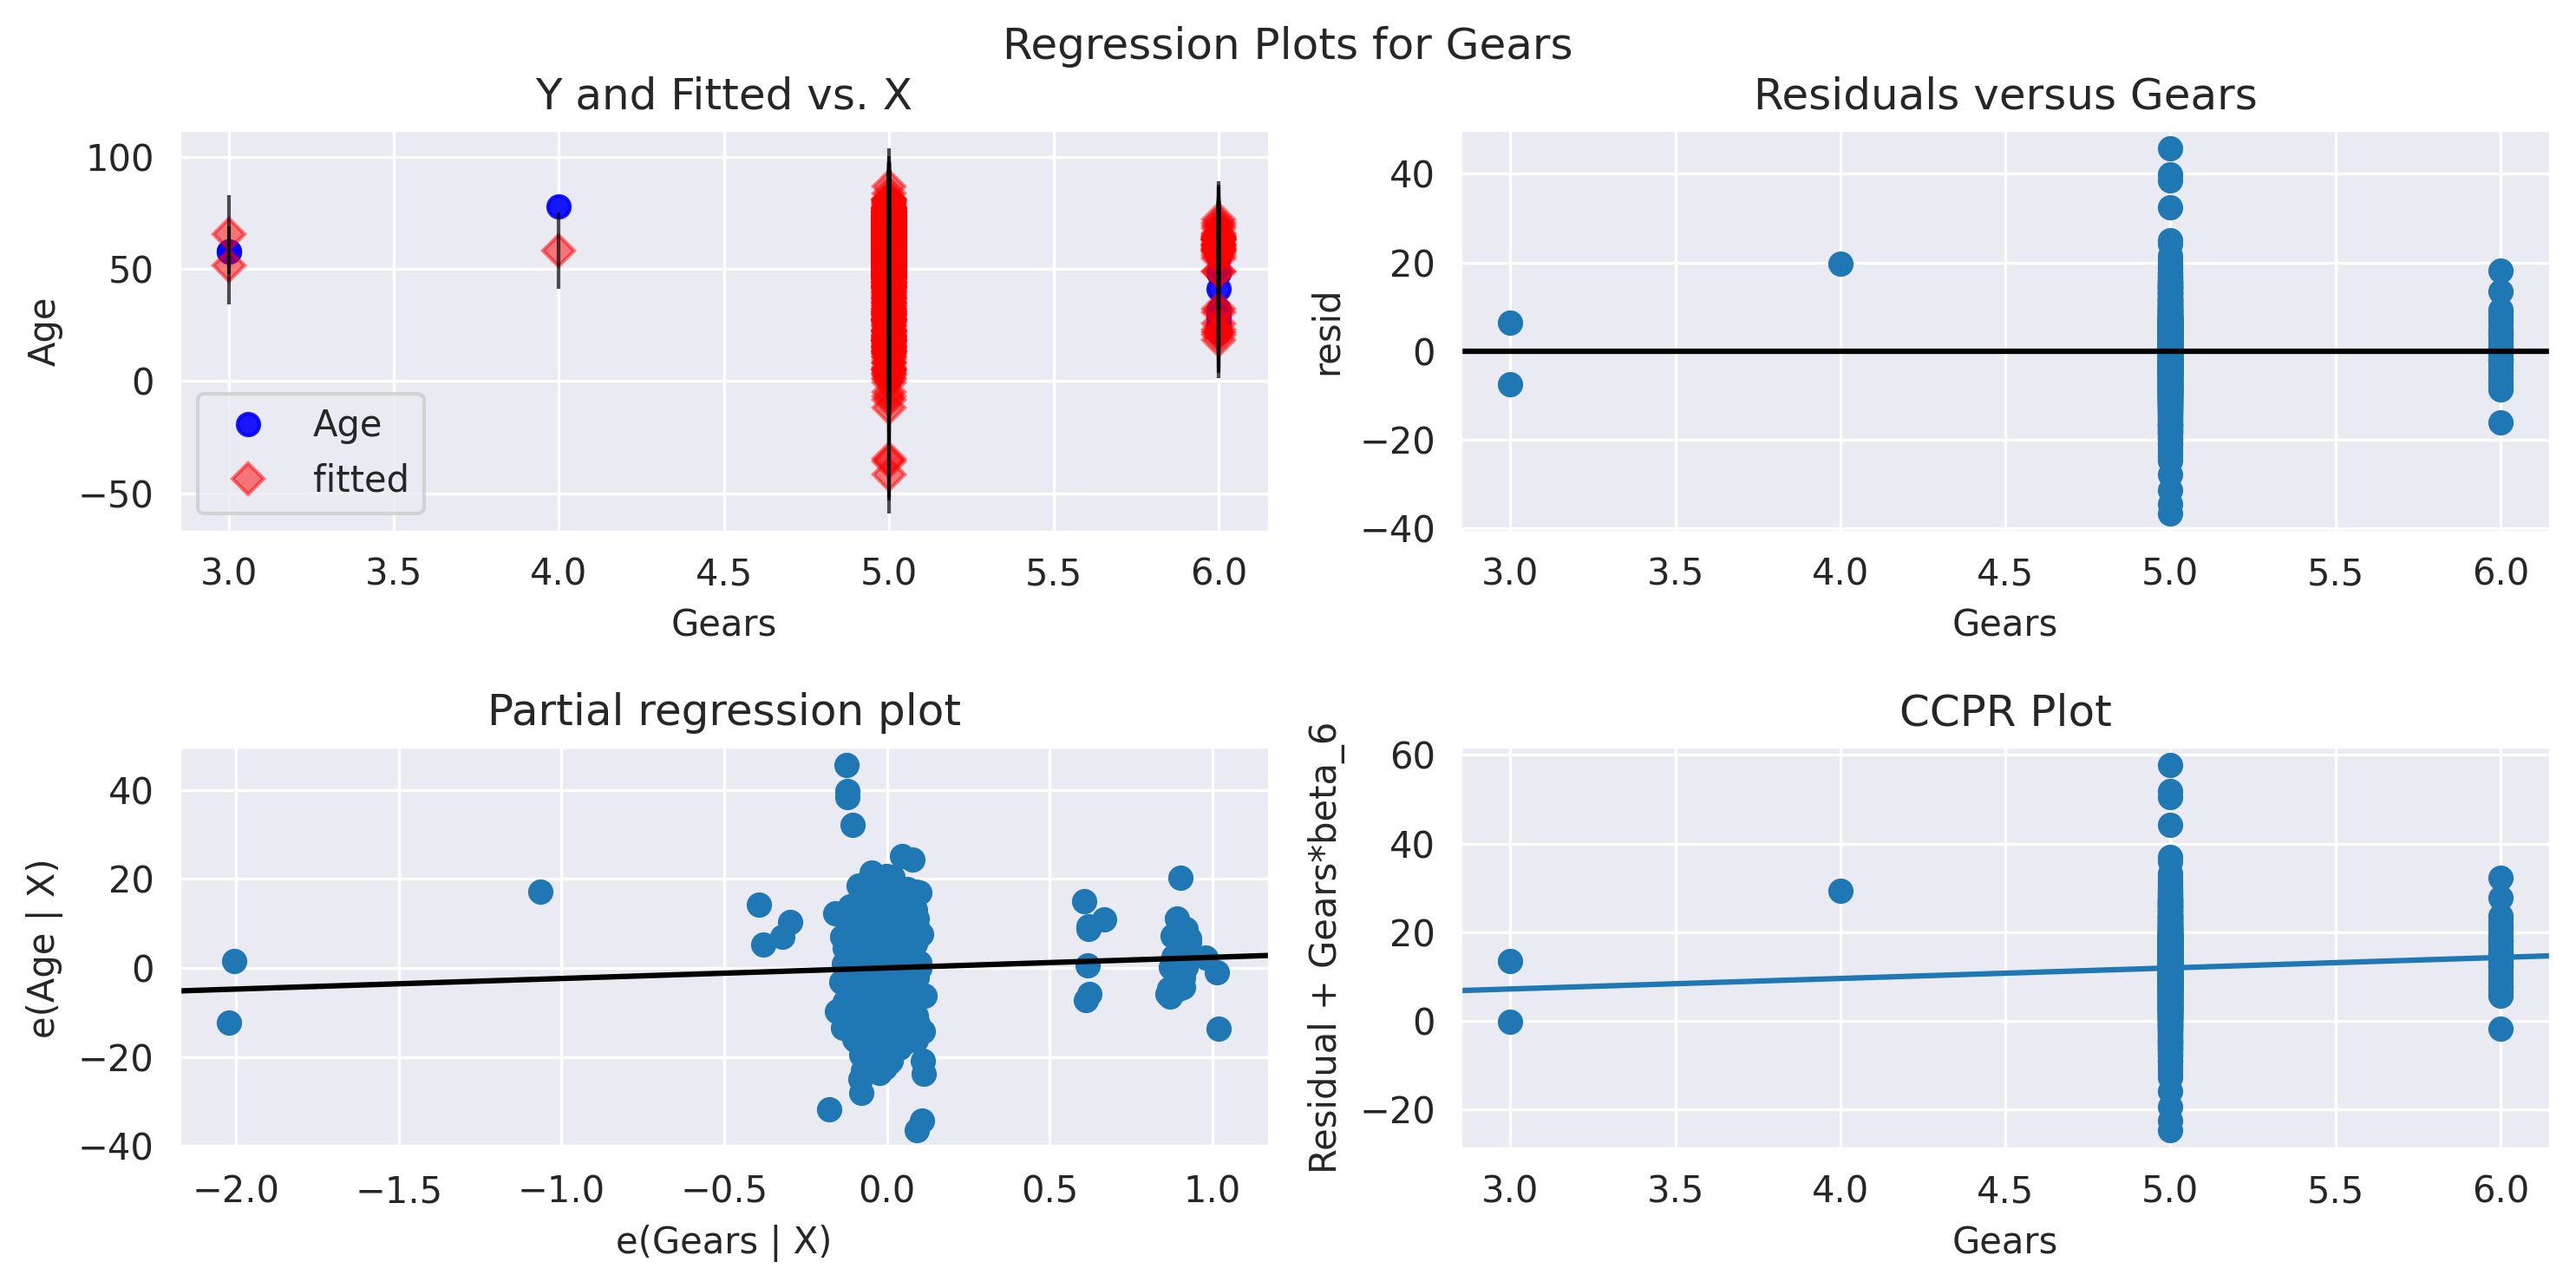

In [ ]:
sm.graphics.plot_regress_exog(Price,'Gears')

eval_env: 1


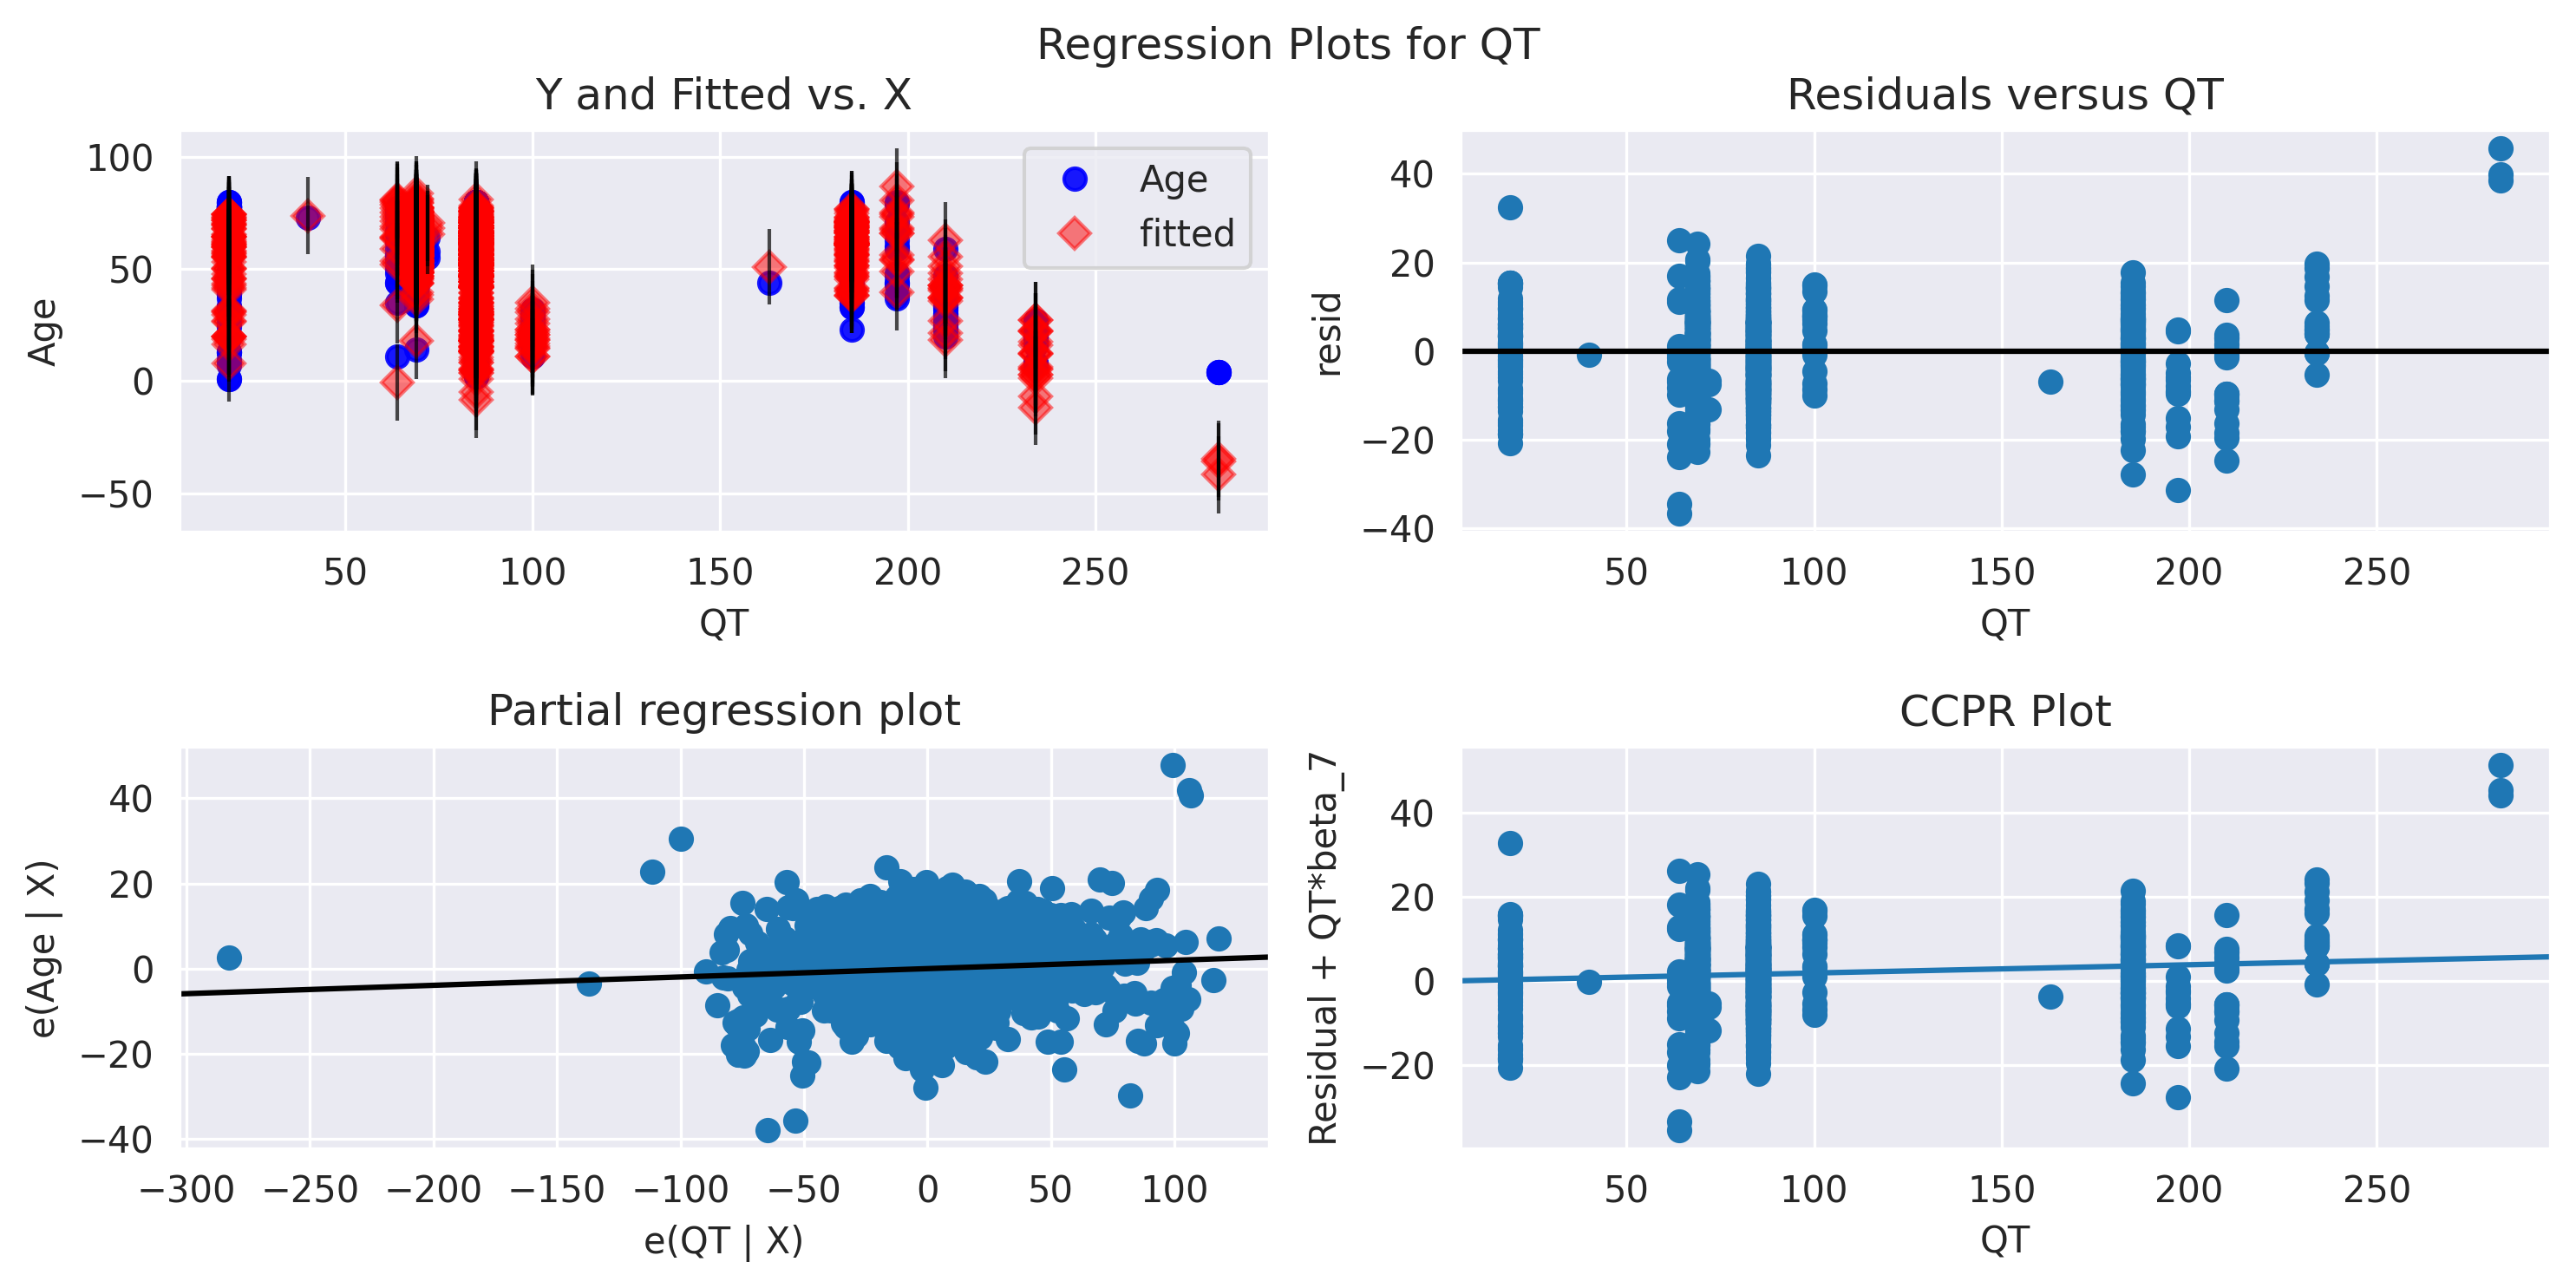

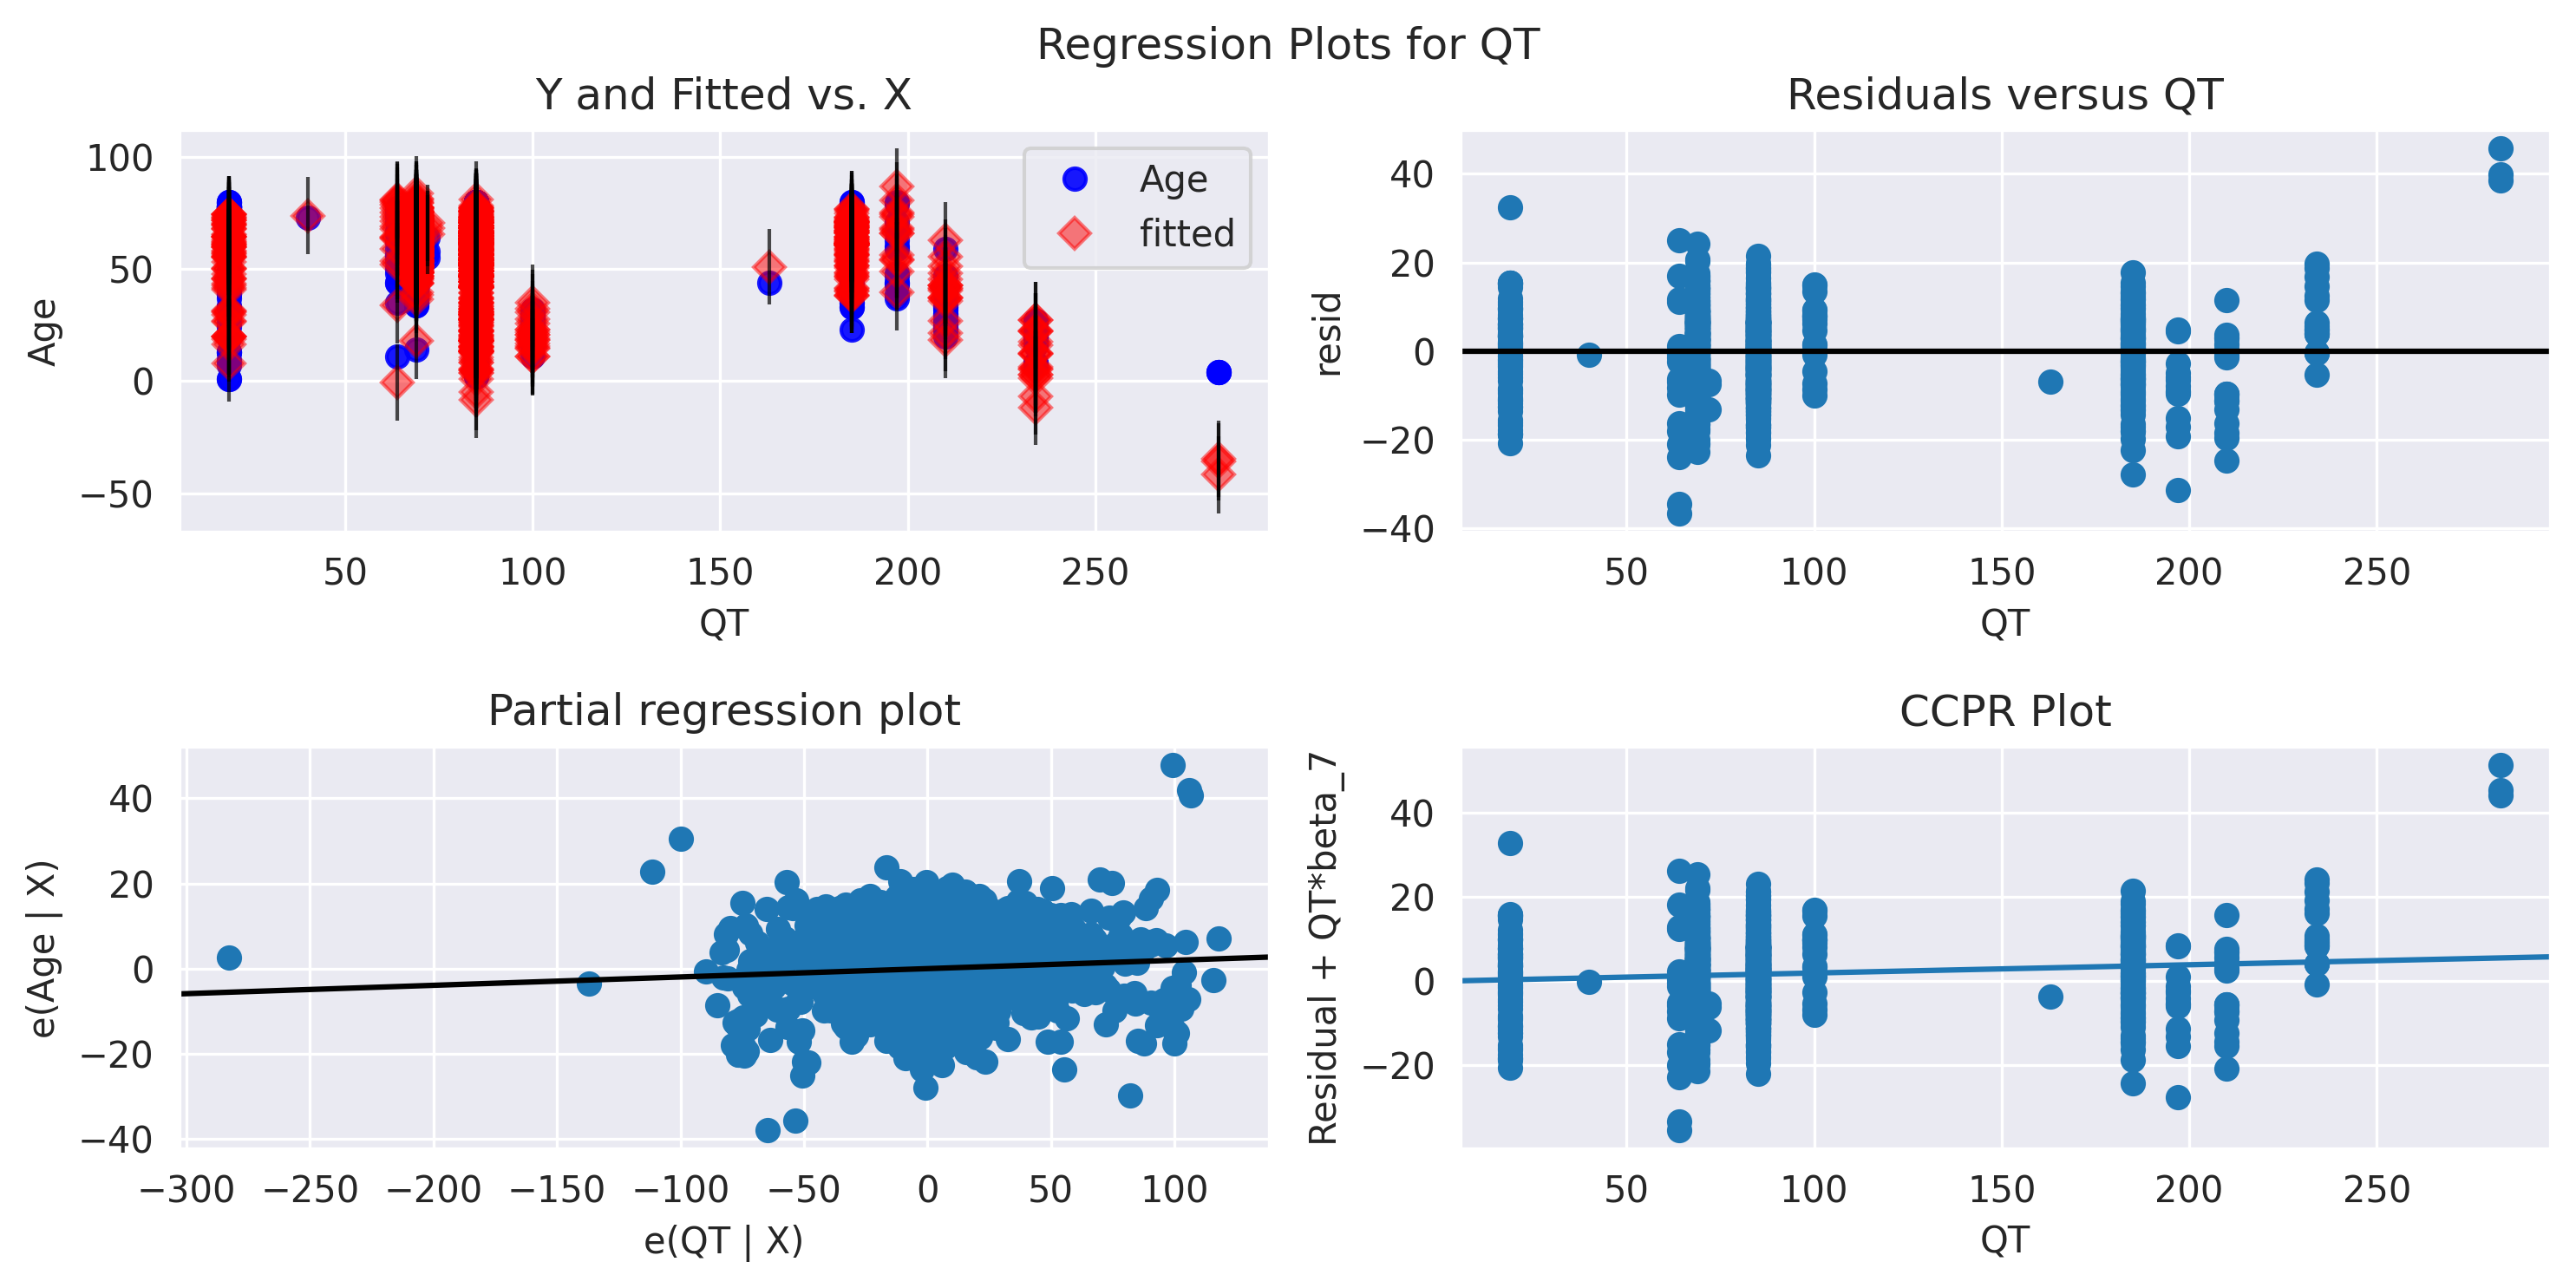

In [ ]:
sm.graphics.plot_regress_exog(Price,'QT')

In [ ]:
# Build SLR and MLR models for insignificant variables 'HP' and 'QT'

In [ ]:
slr_c=smf.ols('Price~HP',data=df).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept     4.906904
 HP           12.525607
 dtype: float64,
 Intercept    1.031004e-06
 HP           3.123394e-34
 dtype: float64)

In [ ]:
slr_d=smf.ols('Price~QT',data=df).fit()
slr_d.tvalues , slr_d.pvalues

(Intercept    41.593196
 QT            8.191956
 dtype: float64,
 Intercept    1.214615e-248
 QT            5.633141e-16
 dtype: float64)

In [ ]:
mlr_cd=smf.ols('Price~HP+QT',data=df).fit()
mlr_cd.tvalues , mlr_cd.pvalues

(Intercept    -2.942801
 HP           16.802106
 QT           13.619911
 dtype: float64,
 Intercept    3.304935e-03
 HP           5.769404e-58
 QT           8.206218e-40
 dtype: float64)

In [ ]:
sns.boxplot(df)
plt.tight_layout()
plt.show()

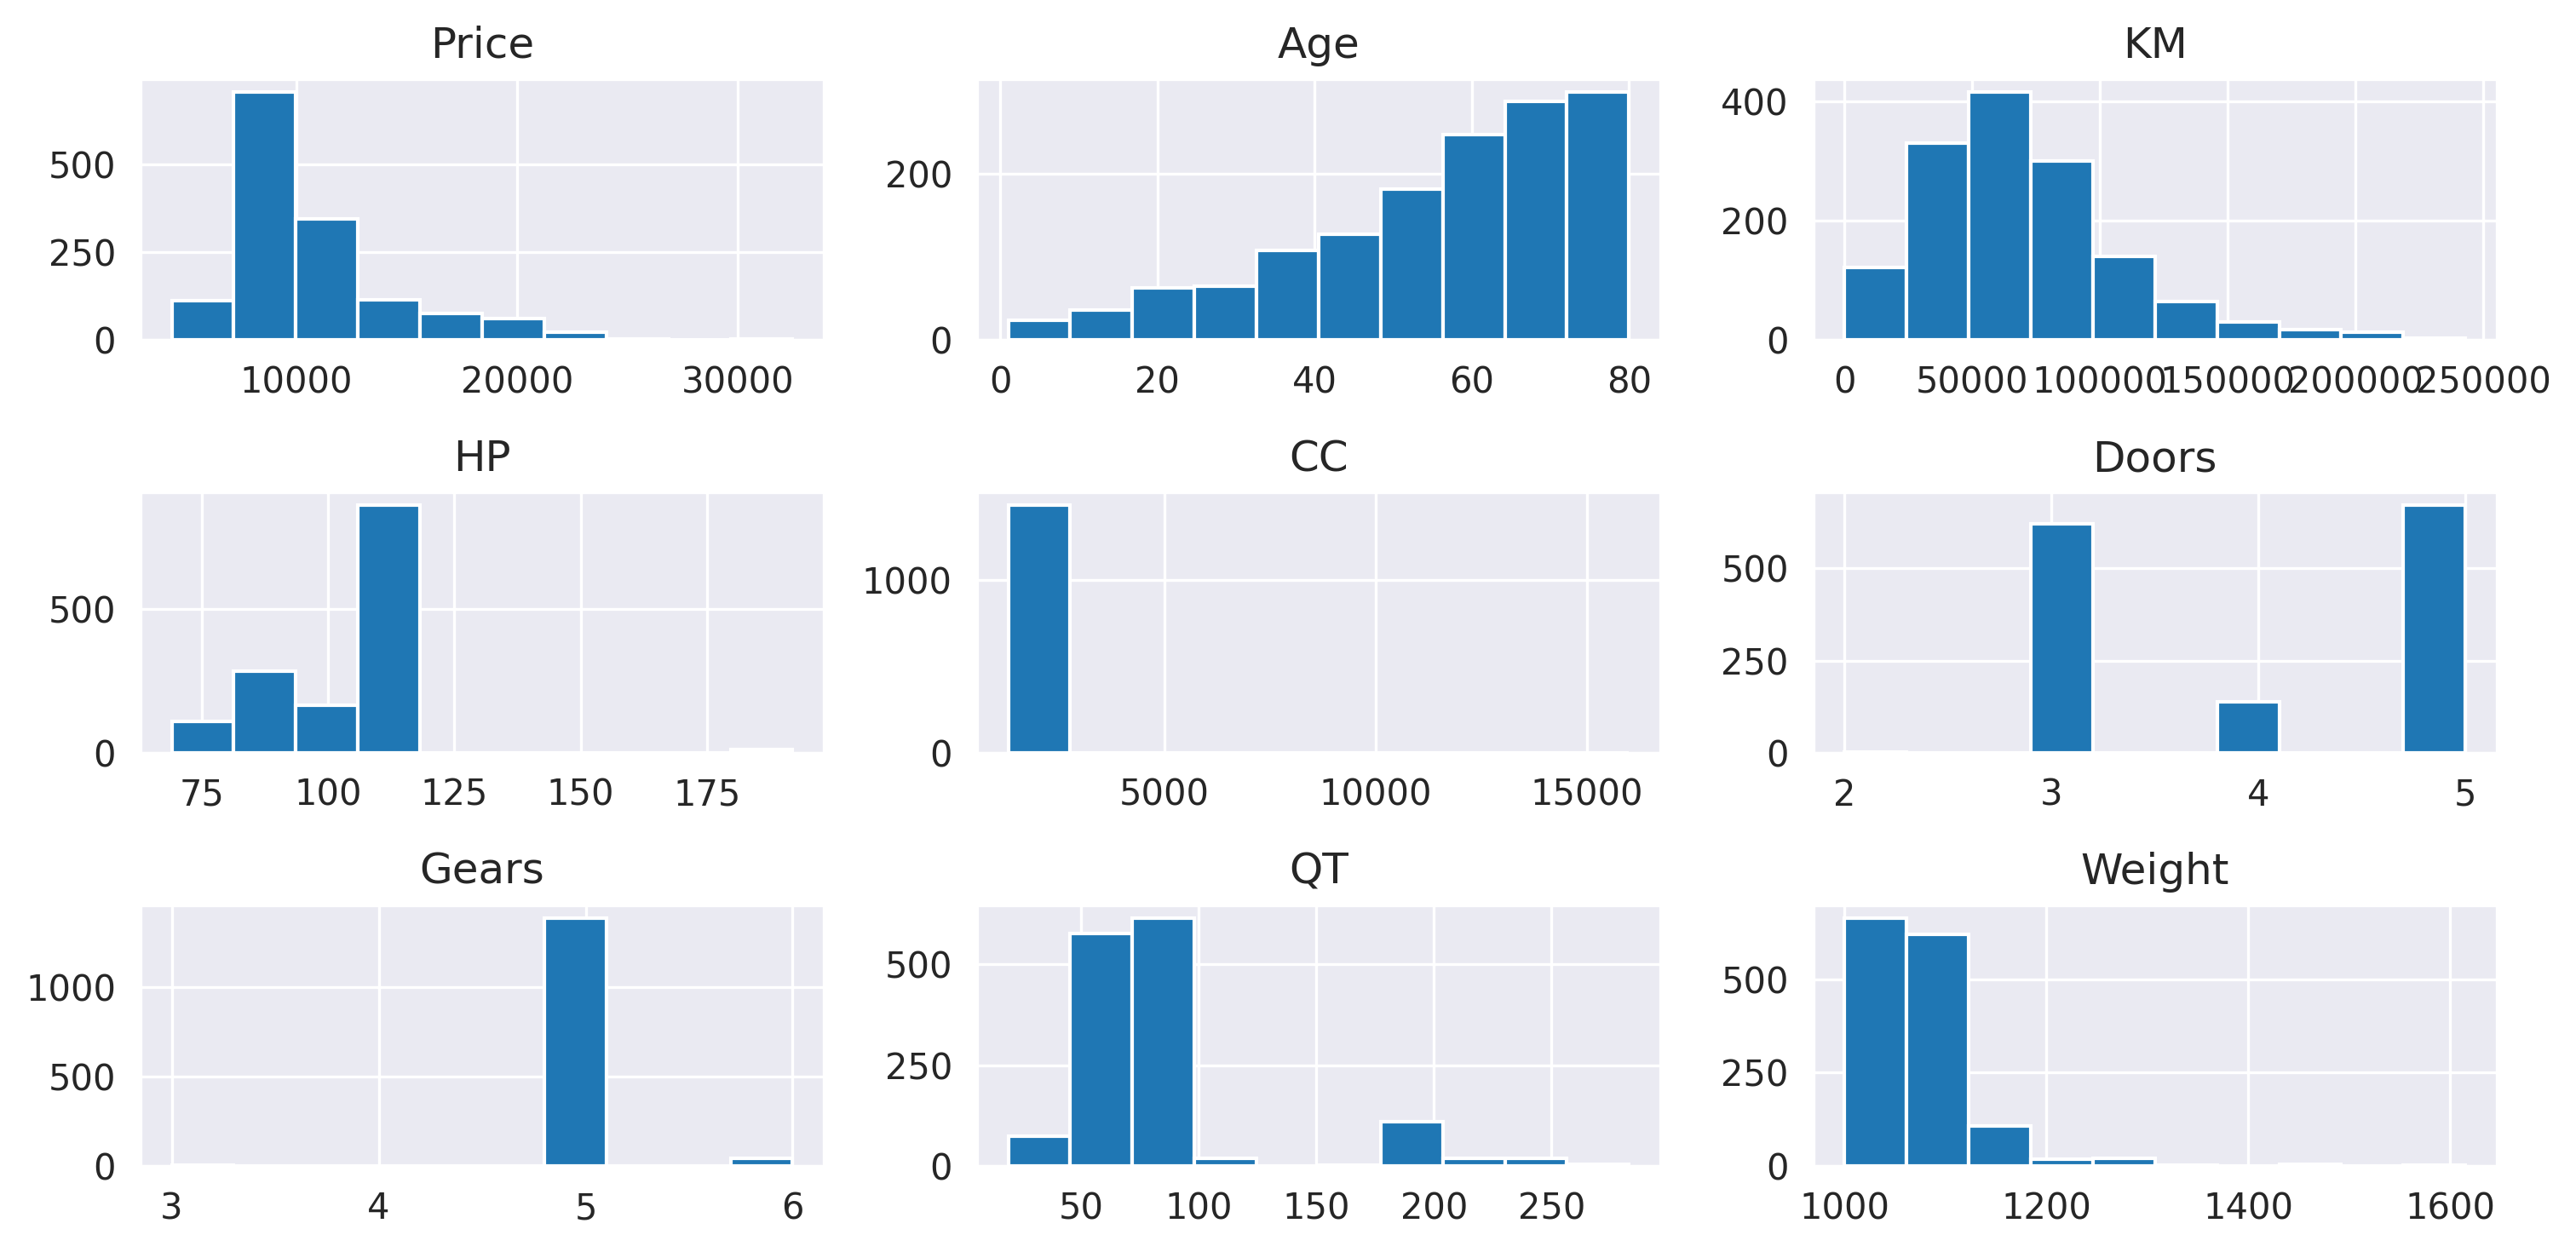

In [ ]:
df.hist()
plt.tight_layout()
plt.show()